In [1]:
# in this notebook, I will try to fit a model relating the mean behavior of L4, L2/3, SST and VIP cells

In [ ]:
# load the data

In [3]:
import pyute as ut
import autograd.numpy as np
import matplotlib.pyplot as plt
import sklearn
import h5py
import pdb
import scipy.optimize as sop
from autograd import elementwise_grad as egrad
from mpl_toolkits.mplot3d import Axes3D
import sklearn.discriminant_analysis as skd
import autograd.scipy.special as ssp
from autograd import jacobian
import size_contrast_analysis as sca
import scipy.stats as sst
import utils
%matplotlib notebook

In [7]:
dsbase = '/Users/dan/Documents/notebooks/mossing-PC/shared_data/'
dsnames = [dsbase+x+'_data_struct.hdf5' for x in ['pyr_l4','pyr_l23','sst_l23','vip_l23']]

In [8]:
nsize,ncontrast = 5,6

In [9]:
tunings = []
uparams = []
displacements = []
pvals = []
for dsname in dsnames:
    print(dsname)
    this_tuning,this_uparam,this_displacement,this_pval = utils.compute_tuning(dsname)
    tunings.append(this_tuning)
    uparams.append(this_uparam)
    displacements.append(this_displacement)
    pvals.append(this_pval)

/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143
<HDF5 group "/session_190202_M10075" (8 members)>
decon
0.39652777777777776


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))
/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_190304_M10077" (8 members)>
decon
0.44027777777777777


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (8 members)>
decon
0.8590277777777777


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_190620_M10616" (8 members)>
decon
0.4568452380952381


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (8 members)>
decon
0.3993055555555556
<HDF5 group "/session_190624_M10615" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.9176587301587301


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_190627_M10616" (8 members)>
decon
0.2123015873015873
/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285
<HDF5 group "/session_181209_M8536" (8 members)>
decon
0.1692857142857143
<HDF5 group "/session_181213_M8536" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (8 members)>
decon
0.05277777777777778
<HDF5 group "/session_190130_M9667" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.8097222222222222


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_190131_M9355" (8 members)>
decon
0.06597222222222222
<HDF5 group "/session_190208_M9355" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.049305555555555554
<HDF5 group "/session_190212_M8536" (8 members)>
decon
0.7534722222222222


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))
/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/dan/Documents/notebooks/mossing-PC/shared_data/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (8 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (8 members)>
decon
0.8441666666666666


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (8 members)>
decon
0.1475
<HDF5 group "/session_181117_M10039" (8 members)>
decon
0.21071428571428572
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285
<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
/Users/dan/Documents/notebooks/mossing-PC/shared_data/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (7 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))
/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_180516_M8956" (8 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (8 members)>
decon
0.6616666666666666


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (8 members)>
decon
0.6375


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (8 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333
<HDF5 group "/session_180903_M8961" (8 members)>
decon
0.8341666666666666


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


In [10]:
with ut.hdf5read(dsnames[1]) as ds:
    keylist = list(ds.keys())

In [11]:
keylist # I think 9667 is the outlier

['session_181205_M10130',
 'session_181209_M8536',
 'session_181213_M8536',
 'session_181214_M10130',
 'session_190102_M10130',
 'session_190128_M8982',
 'session_190130_M9667',
 'session_190131_M9355',
 'session_190208_M9355',
 'session_190212_M8536']

In [13]:
selection = utils.default_selection()
selection[1] = [0,1,2,3,4,5,7,8,9]
rs = utils.gen_rs(dsnames=dsnames,selection=selection)
# ut.mkdir('data')
# np.save('data/celltype_rate_summary.npy',rs)
# rs = np.load('data/celltype_rate_summary.npy',allow_pickle=True)

/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l4_data_struct.hdf5
<HDF5 group "/session_181127_M10073" (8 members)>
decon
0.1742857142857143
<HDF5 group "/session_190202_M10075" (8 members)>
decon
0.39652777777777776
<HDF5 group "/session_190304_M10077" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))
/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.44027777777777777


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190607_M10443" (8 members)>
decon
0.8590277777777777


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_190620_M10616" (8 members)>
decon
0.4568452380952381


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_190620_M10619" (8 members)>
decon
0.3993055555555556
<HDF5 group "/session_190624_M10615" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.9176587301587301


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_190627_M10616" (8 members)>
decon
0.2123015873015873
/Users/dan/Documents/notebooks/mossing-PC/shared_data/pyr_l23_data_struct.hdf5
<HDF5 group "/session_181205_M10130" (8 members)>
decon
0.26785714285714285
<HDF5 group "/session_181209_M8536" (8 members)>
decon
0.1692857142857143
<HDF5 group "/session_181213_M8536" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.9614285714285714
<HDF5 group "/session_181214_M10130" (8 members)>
decon
0.5857142857142857


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_190102_M10130" (8 members)>
decon
0.5508333333333333
<HDF5 group "/session_190128_M8982" (8 members)>
decon
0.05277777777777778
<HDF5 group "/session_190130_M9667" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.8097222222222222


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_190131_M9355" (8 members)>
decon
0.06597222222222222
<HDF5 group "/session_190208_M9355" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.049305555555555554
<HDF5 group "/session_190212_M8536" (8 members)>
decon


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


0.7534722222222222


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


/Users/dan/Documents/notebooks/mossing-PC/shared_data/sst_l23_data_struct.hdf5
<HDF5 group "/session_180713_M9053" (8 members)>
decon
0.8091666666666667
<HDF5 group "/session_180714_M9053" (8 members)>
decon
0.8441666666666666


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_180802_M9053" (8 members)>
decon
0.5083333333333333


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180821_M9417" (8 members)>
decon
0.1475
<HDF5 group "/session_181117_M10039" (8 members)>
decon
0.21071428571428572
<HDF5 group "/session_181120_M10039" (8 members)>
decon
0.14285714285714285
<HDF5 group "/session_181121_M10039" (8 members)>
decon
0.06142857142857143
/Users/dan/Documents/notebooks/mossing-PC/shared_data/vip_l23_data_struct.hdf5
<HDF5 group "/session_180321_M7955" (7 members)>
<HDF5 group "/session_180412_M7955" (8 members)>
decon
0.989


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))
/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))


<HDF5 group "/session_180516_M8956" (8 members)>
decon
0.725
<HDF5 group "/session_180519_M8959" (8 members)>
decon
0.9425
<HDF5 group "/session_180528_M8959" (8 members)>
decon
0.6616666666666666


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180531_M8961" (8 members)>
decon
0.6375


/Users/dan/Documents/code/adesnal/pyute.py:1062: RuntimeWarning: Mean of empty slice
  tuning[:,itype] = np.nanmean(data[cell_criteria][:,these_trials],1)


<HDF5 group "/session_180618_M8956" (8 members)>
decon
0.9958333333333333
<HDF5 group "/session_180719_M8961" (8 members)>
decon
0.009166666666666667
<HDF5 group "/session_180720_M8961" (8 members)>
decon
0.04583333333333333
<HDF5 group "/session_180903_M8961" (8 members)>
decon
0.8341666666666666


/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:54: RuntimeWarning: invalid value encountered in less
  lkat = ut.k_and(pval[ikey]<0.05,~np.isnan(X[:,0]),~np.isnan(y[:,0]))
/Users/dan/Documents/notebooks/mossing-PC/simulation/utils.py:105: RuntimeWarning: invalid value encountered in less
  return np.logical_and(criterion(displacement),pval < pcutoff)
/opt/anaconda3/envs/py3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: Mean of empty slice
  return f_raw(*args, **kwargs)


In [14]:
def sum_to_1(r):
    R = r.reshape((r.shape[0],-1))
    R = R/np.nansum(R,axis=1)[:,np.newaxis]
    return R
Rs = [[None,None] for i in range(len(rs))]
for iR,r in enumerate(rs):
    for ialign in range(2):
        Rs[iR][ialign] = sum_to_1(r[ialign])

<IPython.core.display.Javascript object>


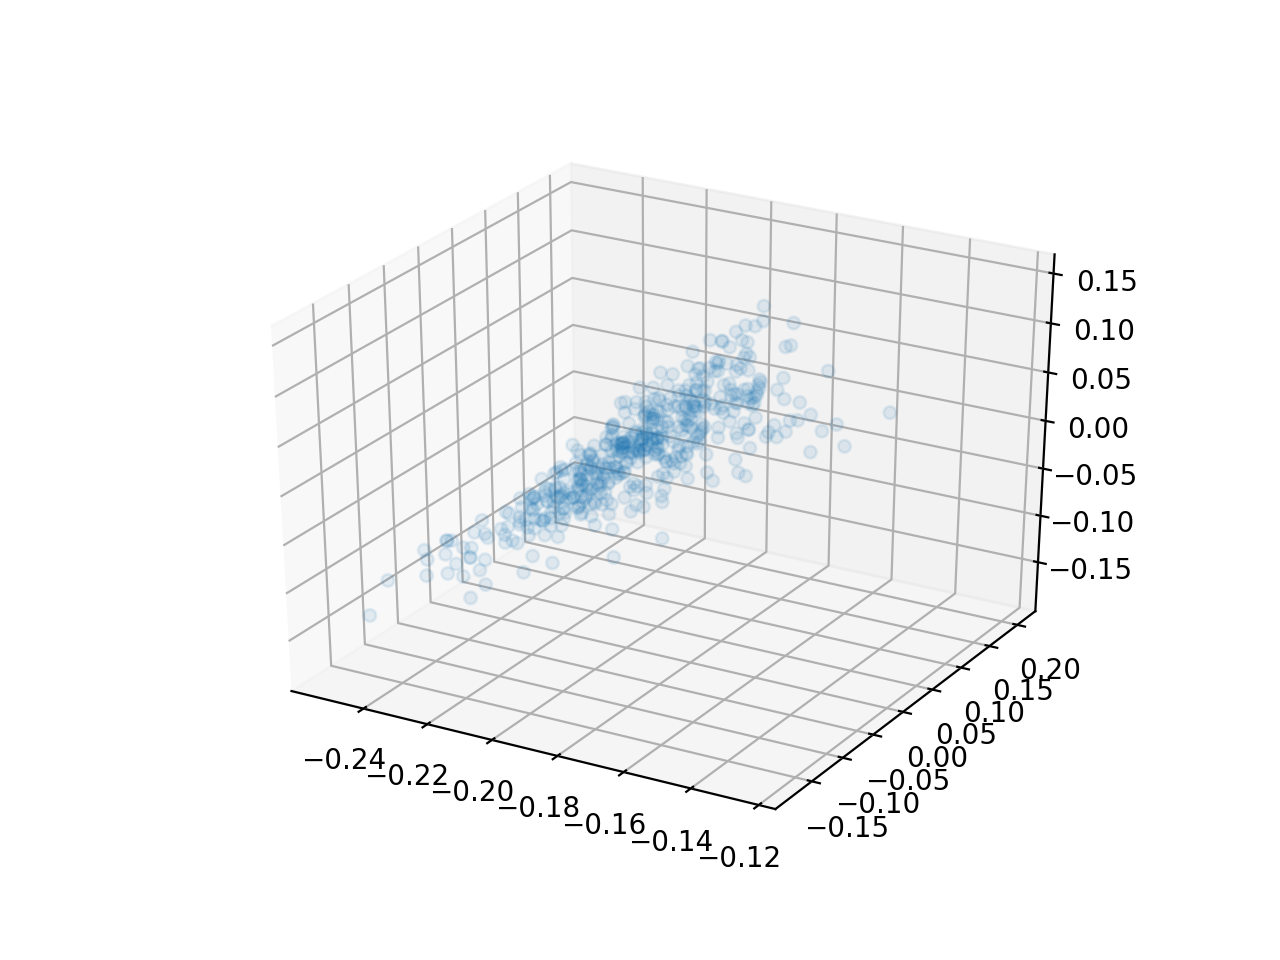

In [15]:
j = 0
u,s,v = np.linalg.svd(Rs[j][0][~np.isnan(Rs[j][0][:,0])])
diaged = Rs[j][0] @ v.T
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(diaged[:,0],diaged[:,1],diaged[:,2],alpha=50/diaged.shape[0])
# plt.xlim(-1,1)
# plt.ylim(-1,1)

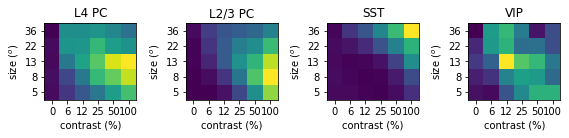

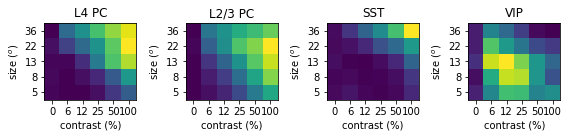

In [10]:
ucontrast = [str(c) for c in np.array((0,6,12,25,50,100))]
usize = [str(s) for s in (5,8,13,22,36)]
celltypes = ['L4 PC', 'L2/3 PC', 'SST', 'VIP']
# aligntypes = ['RF distance <10$^o$']
saveas = ['figures/four_cell_types_aligned.pdf','figures/four_cell_types_misaligned.pdf']
for ialign in range(2):
    plt.figure(figsize=(8,2))
    for icelltype in range(len(celltypes)):
        plt.subplot(1,4,icelltype+1)
        sca.show_size_contrast(rs[icelltype][ialign].mean(0),flipud=True)
        plt.title(celltypes[icelltype])
    plt.tight_layout()
    plt.savefig(saveas[ialign])

In [16]:
def plot_size_tuning_by_contrast(arr,cs):
    usize = np.array((0,8,13,22,36))
    to_plot = arr.mean(0)
    arr_sz = gen_size_tuning(arr)
    arr_sz = arr_sz/arr_sz.max(1).max(1).max(1)[:,np.newaxis,np.newaxis,np.newaxis]
    lb,ub = ut.bootstrap(arr_sz,np.mean,pct=(2.5,97.5))
    colors = ['k','r']
    lbls = ['light off','light on']
    to_plot = arr_sz.mean(0)
    for ic,c in enumerate(cs):
        plt.subplot(1,len(cs),ic+1)
        for il in range(2):
            ut.plot_bootstrapped_errorbars_hillel(usize,arr_sz[:,:,c:c+1,il].transpose((0,2,1)),markersize=5,colors=colors[il])
        plt.ylim(to_plot.min()-0.1,to_plot.max()+0.1)
        plt.xlabel('size ($^o$)')
    plt.legend(lbls)
    plt.subplot(1,len(cs),1)
    plt.ylabel('event rate / max event rate')
#     plt.tight_layout()

def gen_size_tuning(sc):
    gray = np.tile(sc[:,0].mean(0)[np.newaxis,np.newaxis],(1,sc.shape[1]))
    to_plot = np.concatenate((gray,sc),axis=0)
    return to_plot

In [17]:
(tunings[0][2]).shape

(1765, 6, 6, 8, 24)

<IPython.core.display.Javascript object>


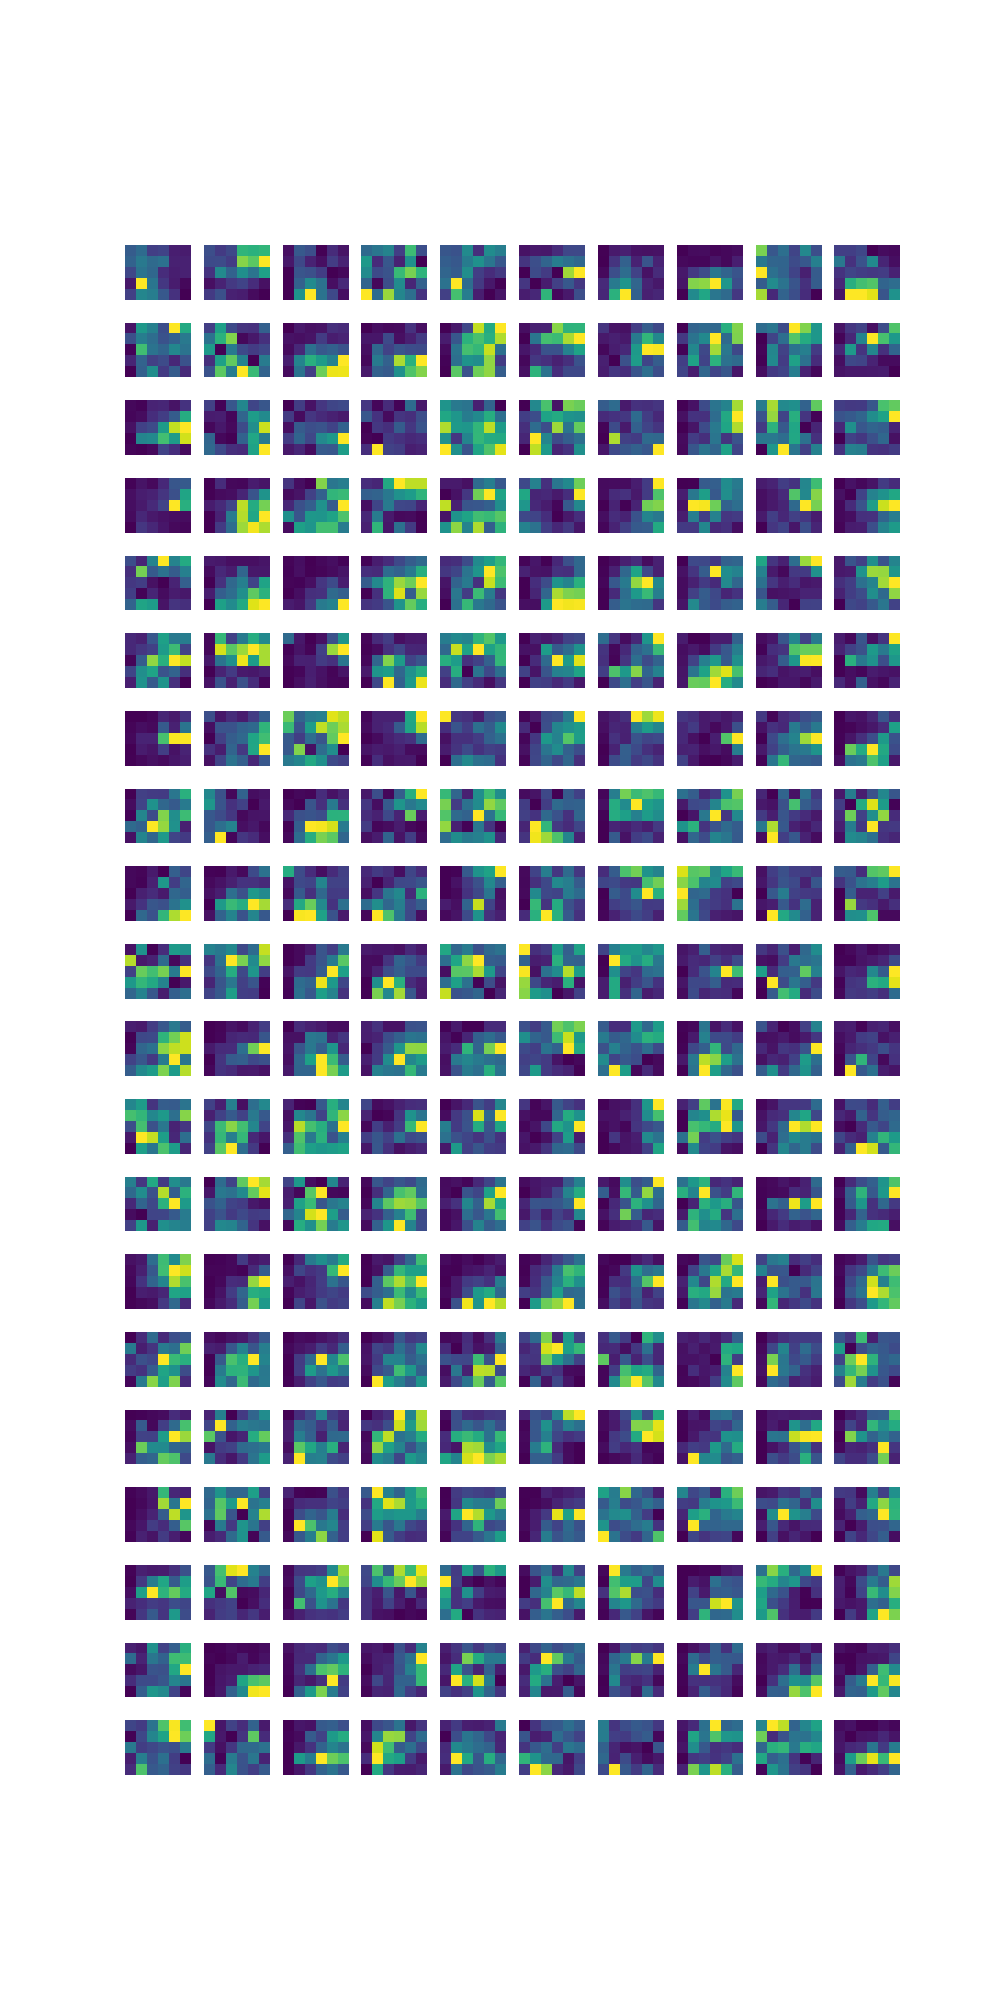

In [18]:
ut.imshow_in_rows(rs[0][0][:200])

In [14]:
# gen_size_tuning(rs[0][0][45])[:,icontrast]

In [19]:
# len(aligned)

<IPython.core.display.Javascript object>


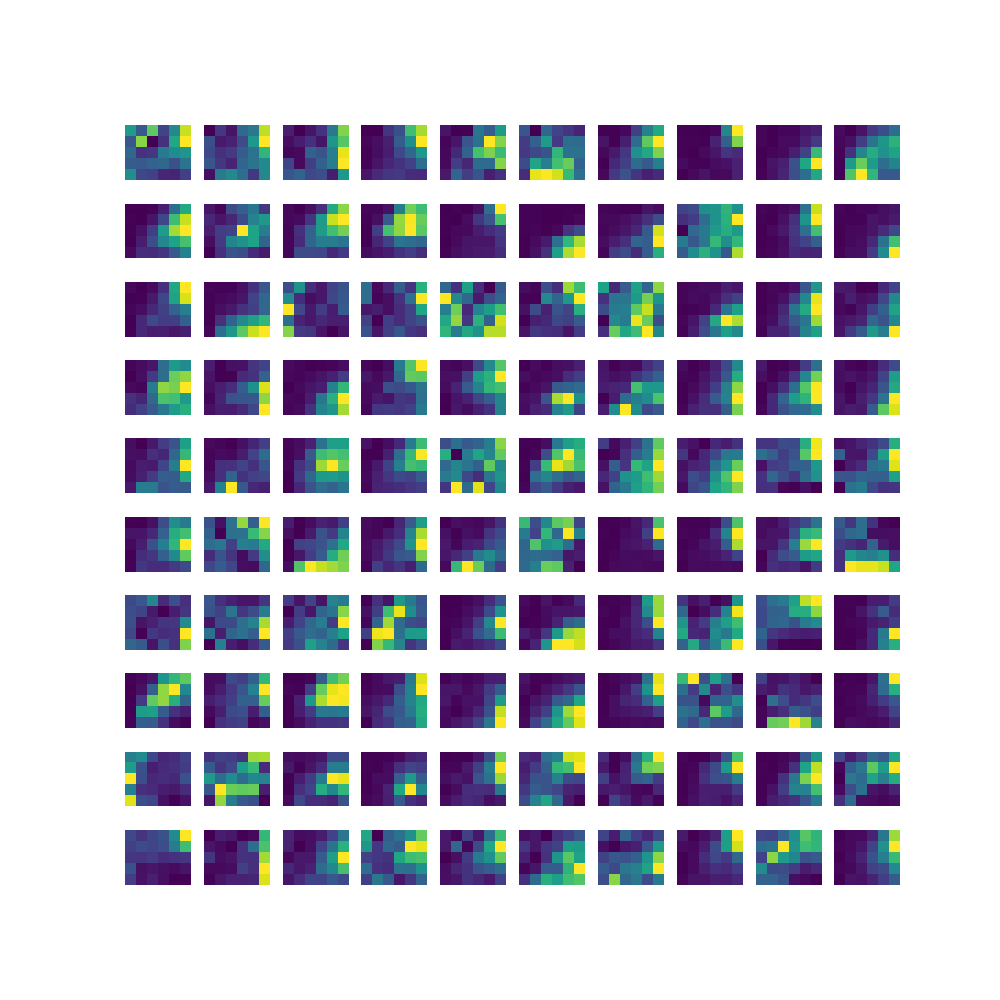

In [21]:
ut.imshow_in_rows(rs[1][0][:100])

<IPython.core.display.Javascript object>


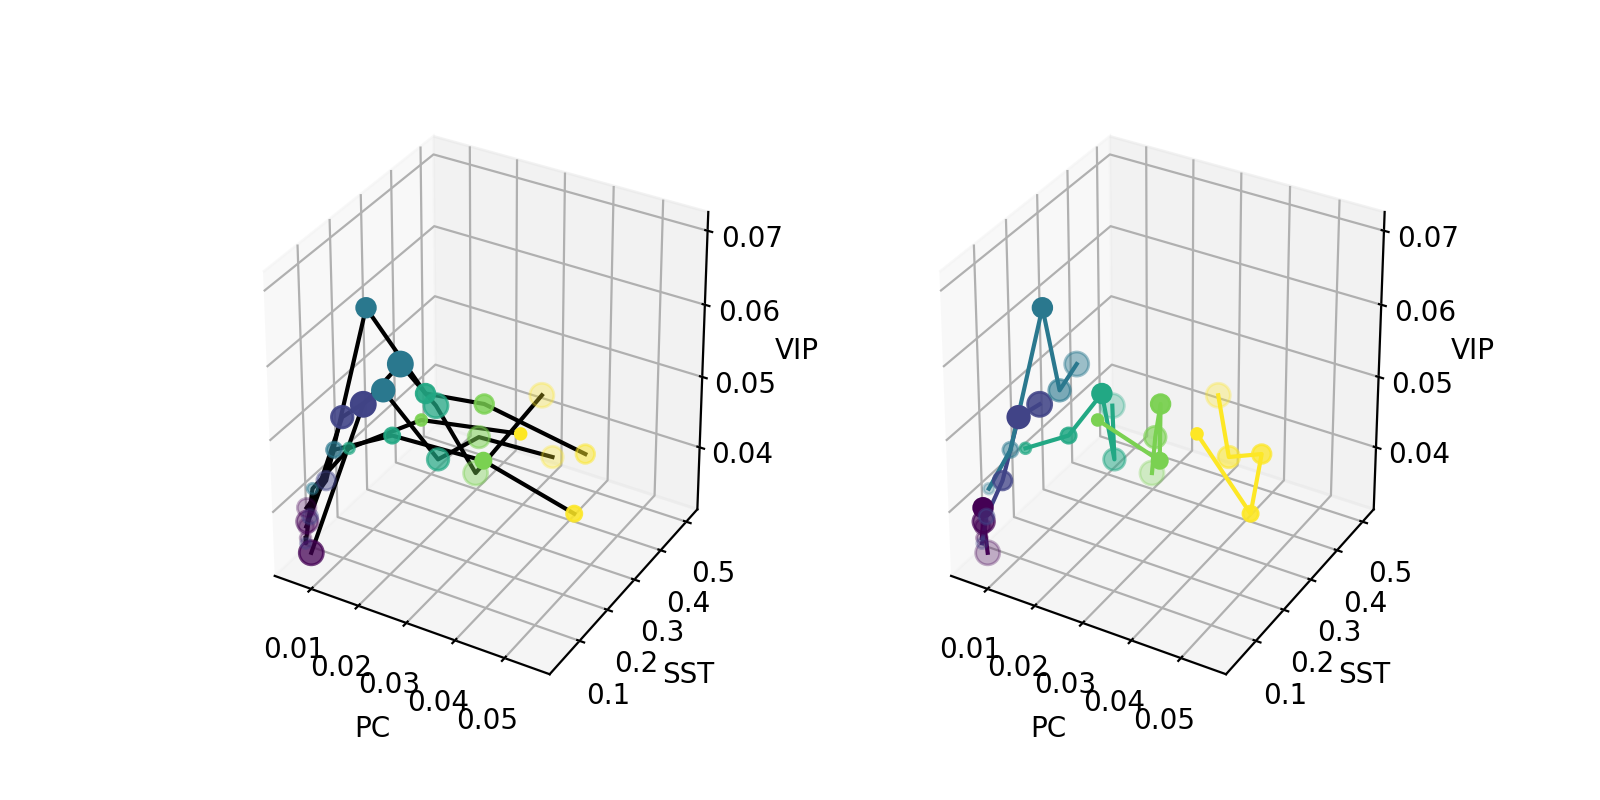

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

Text(0.5, 0, 'VIP')

In [22]:
r_to_plot = [None for i in range(3)]
ialign = 0
r_to_plot[0] = rs[1][ialign].mean(0)
r_to_plot[1] = rs[2][ialign].mean(0)
r_to_plot[2] = rs[3][ialign].mean(0)
colors = plt.cm.viridis(np.linspace(0,1,6))

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1,projection='3d')
for i in range(5):
    ax.plot(r_to_plot[0][i],r_to_plot[1][i],r_to_plot[2][i],c='k')
    ax.scatter(r_to_plot[0][i],r_to_plot[1][i],r_to_plot[2][i],c=colors,s=15*i+15)#,r_to_plot[2][i],c=colors,s=15*i+10)
plt.xlabel('PC')
plt.ylabel('SST')
ax.set_zlabel('VIP')
ax = fig.add_subplot(1,2,2,projection='3d')
for i in range(6):
    ax.plot(r_to_plot[0][:,i],r_to_plot[1][:,i],r_to_plot[2][:,i],c=colors[i])
    ax.scatter(r_to_plot[0][:,i],r_to_plot[1][:,i],r_to_plot[2][:,i],c=colors[i],s=15*np.arange(5)+15)
plt.xlabel('PC')
plt.ylabel('SST')
ax.set_zlabel('VIP')
#plt.tight_layout()
# plt.savefig('figures/wire_plots_size_contrast.pdf')

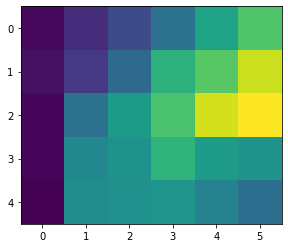

In [20]:
plt.figure()
icelltype = 0
ialign = 0
plt.imshow((rs[icelltype][ialign]/np.sqrt((rs[icelltype][ialign]**2).sum(1).sum(1)[:,np.newaxis,np.newaxis])).mean(0))
rss = (rs[icelltype][ialign]/np.sqrt((rs[icelltype][ialign]**2).sum(1).sum(1)[:,np.newaxis,np.newaxis])).reshape(rs[icelltype][ialign].shape[0],-1)
u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])

<IPython.core.display.Javascript object>


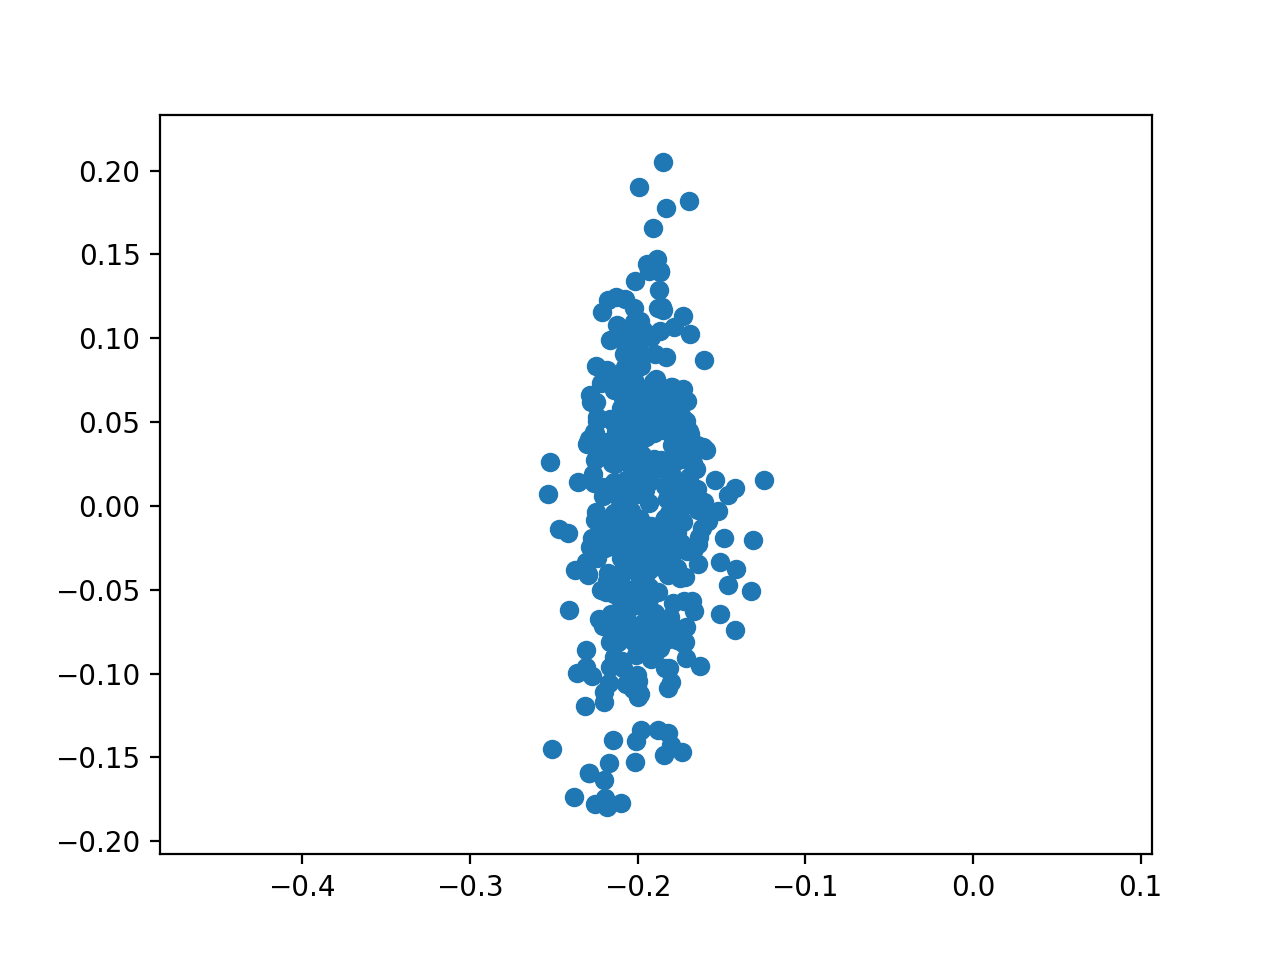

(-0.2665277826398108,
 -0.11144350876539985,
 -0.20782343930889147,
 0.23298986891069506)

In [23]:
plt.figure()
# a = np.random.rand(u.shape[0])
i1 = 0
i2 = 1
plt.scatter(u[:,i1]*s[i1],u[:,i2]*s[i2])
plt.axis('equal')
# %matplotlib notebook

<IPython.core.display.Javascript object>


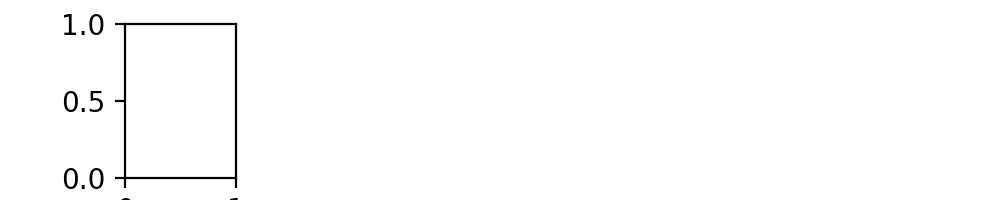

NameError: name 'rss' is not defined

In [24]:
maxdim = 4
for iroi in range(5):
    plt.figure(figsize=(maxdim+1,1))
    plt.subplot(1,maxdim+2,1)
    plt.imshow(rss[iroi].reshape((nsize,ncontrast)))
    plt.axis('off')
    for imaxdim in range(maxdim+1):
        plt.subplot(1,maxdim+2,imaxdim+2)
        extra_var = np.array([(u[iroi,idim]*s[idim]*v[idim,:]).reshape((nsize,ncontrast)) for idim in range(imaxdim)])
        plt.imshow(rss.mean(0).reshape((nsize,ncontrast))+extra_var.sum(0))
        plt.axis('off')

<IPython.core.display.Javascript object>


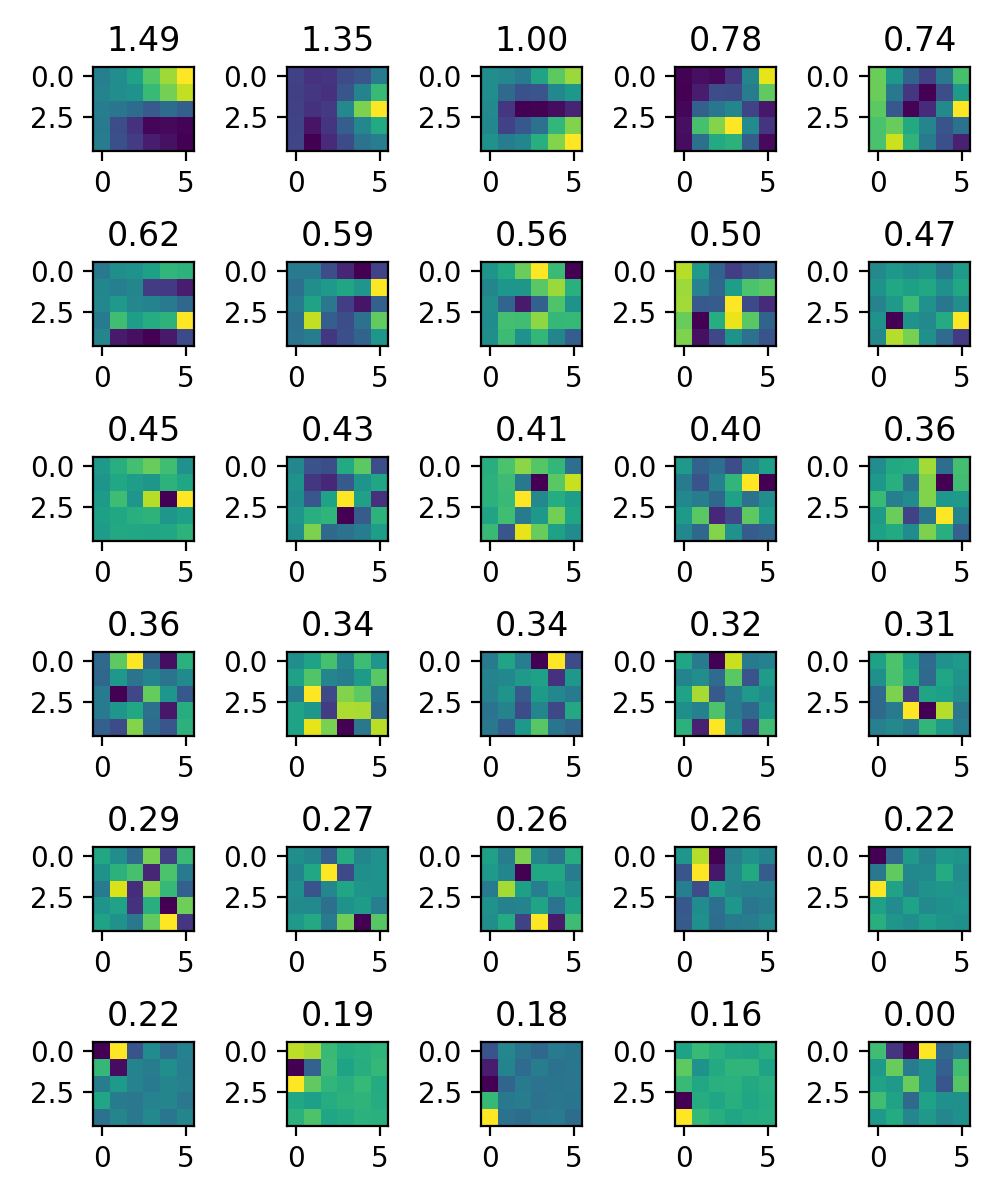

In [25]:
plt.figure(figsize=(5,6))
icelltype = 0
ialign = 0
plt.imshow(rs[icelltype][ialign].mean(0))
rss = Rs[icelltype][ialign].reshape(Rs[icelltype][ialign].shape[0],-1)
u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
for idim in range(30):
    plt.subplot(6,5,idim+1)
    plt.imshow(v[idim].reshape((5,6)))
    plt.title('%.2f'%s[idim])
plt.tight_layout()

In [26]:
reload(utils)

NameError: name 'reload' is not defined

In [27]:
def fit_W_variability_relaxed(Xhat,Xpc_list,Yhat,Ypc_list,pop_rate_fn=None,neuron_rate_fn=None,W0list=None,bounds=None,niter=10,wt_dict=None,eta=0.1):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    Xpc_list = Xpc_list[0].copy()+Xpc_list[1].copy()
    Ypc_list = Ypc_list[0].copy()+Ypc_list[1].copy() # list of (npixels*Q) elements
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    noise = 1
    
    f_sq_second_argument = lambda a,b: pop_rate_fn(a,b**2)
    fprime_m = utils.fprime_miller_troyer #egrad(pop_rate_fn,0)
    fprime_s = egrad(f_sq_second_argument,1)
    fprime_s2 = egrad(pop_rate_fn,1)
    
    YYhat = np.concatenate(Yhat,axis=1)
    XXhat = np.concatenate(Xhat,axis=1)
#     print(XXhat)
    
    nS = len(Yhat)
    assert(nS==len(Xhat))
    nN,nP = Xhat[0].shape
    nQ = Yhat[0].shape[1]
    assert(nN==Yhat[0].shape[0])
    
    def add_key_val(d,key,val):
        if not key in d:
            d[key] = val
    
    if wt_dict is None:
        wt_dict = {}
    add_key_val(wt_dict,'celltypes',np.ones((1,nS*nQ)))
    add_key_val(wt_dict,'inputs',np.concatenate([np.array((1,0)) for i in range(nS)],axis=0)[np.newaxis,:])
    add_key_val(wt_dict,'stims',np.ones((nN,1)))
    add_key_val(wt_dict,'X',1)
    add_key_val(wt_dict,'Y',1)
    add_key_val(wt_dict,'Eta',1)
    add_key_val(wt_dict,'Xi',1)
    
    wtCell = wt_dict['celltypes']
    wtInp = wt_dict['inputs']
    wtStim = wt_dict['stims']
    wtX = wt_dict['X']
    wtY = wt_dict['Y']
    wtEta = wt_dict['Eta']
    wtXi = wt_dict['Xi']
    
    first = True
        
#     lower_bound = np.array([b[0] for b in bounds])
#     upper_bound = np.array([b[1] for b in bounds])
        
    # Yhat is all measured tuning curves, Y is the averages of the model tuning curves
    def parse_W(W):
        # Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,YY,Eta,Xi
        shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ),(nN,nS*nQ)]
        Ws = parse_thing(W,shapes)
        return Ws
    
    def parse_thing(V,shapes):
        for shape in shapes:
            if type(shape) is int:
                shape = (shape,)
        sizes = [np.prod(shape) for shape in shapes]
        sofar = 0
        outputs = []
        for size,shape in zip(sizes,shapes):
            if size > 1:
                new_element = V[sofar:sofar+size].reshape(shape)
            else:
                new_element = V[sofar] # if just a float
            outputs.append(new_element)
            sofar = sofar + size
        return outputs
    
    def unparse_W(*Ws):
        return np.concatenate([ww.flatten() for ww in Ws])
    
    def normalize(arr):
        arrsum = arr.sum(1)
        well_behaved = (arrsum>0)[:,np.newaxis]
        arrnorm = well_behaved*arr/arrsum[:,np.newaxis] + (~well_behaved)*np.ones_like(arr)/arr.shape[1]
        return arrnorm
    
    def gen_Weight(W,K,kappa):
        WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
        WW1 = np.concatenate((W*K[np.newaxis,:]*kappa,W),axis=1)
        WW = np.concatenate((WW0,WW1),axis=0)
        return WW
    
    def take_one_step(W0,eta):
        
#         print(first)
        # see derivations on pg. 77 of Notes VIII
#         def compute_siginv(stim_deriv,noise):
#             # stim_deriv (nN,), noise a scalar, giving the variance of measurement noise
#             # Sherman-Morrison formula to yield inv(sigma^2*eye + uuT)
#             uuT = np.outer(stim_deriv,stim_deriv)
#             uTu = np.inner(stim_deriv,stim_deriv)
#             siginv = 1/noise*(np.eye(nN) - uuT/(uTu + noise))
#             return siginv
        
        def inner_product_(a,b):
            if len(a.shape)==1:
                return a*b
            else:
                return (a*b).sum(1)
    
        def compute_tr_siginv2_sig1(stim_deriv,noise,pc_list):
            # pc_list a list of PCs of the covariance matrix, each a tuple of (sigma,normed vector)
            tot = 0
            for icelltype in range(stim_deriv.shape[1]):
                sigma2 = np.linalg.norm(stim_deriv[:,icelltype])
#                 inner_prod = np.sum([pc[0]**2*sigma2**2*np.inner(stim_deriv[:,icelltype]/sigma2,pc[1]) for pc in pc_list[icelltype]])
                if sigma2>0:
                    inner_prod = np.sum([pc[0]**2*sigma2**2*inner_product_(stim_deriv[:,icelltype]/sigma2,pc[1]) for pc in pc_list[icelltype]])
                else:
                    inner_prod = np.zeros((nN,))
#                 print(inner_prod.sum())
#                 print(-1/noise/(noise + sigma2**2))
                tot = tot - 1/noise/(noise + sigma2**2)*inner_prod.sum()
            return tot
        
        def compute_log_det_sig2(stim_deriv,noise):
            sigma2 = np.linalg.norm(stim_deriv)
            return np.log(sigma2**2+noise)
        
        def compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model):
#             siginv2 = compute_siginv(stim_deriv,noise)
            # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) term contributes
            mu_dist = mu_model-mu_data
            inner_prod = inner_product_(stim_deriv,mu_dist) #np.einsum(stim_deriv,mu_dist,'ik,jk->ij')
            sigma2 = np.linalg.norm(stim_deriv)
#             print(mu_dist)
#             print(sigma2)
#             print(inner_prod)
#             print((inner_prod**2).sum())
#             print(-1/noise/(noise+sigma2**2))
            noise_term = 1/noise*inner_product_(mu_dist,mu_dist).sum() #np.inner(mu_dist,mu_dist)
            cov_term = -1/noise/(noise+sigma2**2)*(inner_prod**2).sum()
#             print([a for a in (noise_term,cov_term)])
            return noise_term #+ cov_term
        
        def compute_kl_divergence(stim_deriv,noise,mu_data,mu_model,pc_list):
            # omitting a few terms: - d - log(sig1) # where d is the dimensionality
            # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) 
            # term in mahalanobis_dist contributes
            log_det = compute_log_det_sig2(stim_deriv,noise)
            tr_sig_quotient = compute_tr_siginv2_sig1(stim_deriv,noise,pc_list)
            maha_dist = compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model)
#             print('3 Parts of KL divergence: ')
#             for a in [log_det,tr_sig_quotient,maha_dist]:
#                 print(a)
#             print([a for a in [log_det,tr_sig_quotient,maha_dist]])
            return 0.5*(log_det + tr_sig_quotient + maha_dist)
#             return 0.5*(maha_dist)
        
        def compute_fprime_(Eta,Xi,s02):
#             Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi = parse_W(W)
#             WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
            return fprime_m(Eta,Xi**2+np.concatenate((s02,s02),axis=0))*Xi

        def compute_f_(Eta,Xi,s02):
            return pop_rate_fn(Eta,Xi**2+np.concatenate((s02,s02),axis=0))
        
        def minusLW(W):
            def u_fn(XX,YY,Wx,Wy,k,kappa):
                WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
                return XX @ WWx + YY @ WWy
            
            def compute_sq_error(a,b,wt):
                return (wt*(a-b)**2).sum()
            
            def compute_kl_error(mu_data,pc_list,mu_model,fprimeval,wt):
                # how to model variability in X?
                kl = compute_kl_divergence(fprimeval,noise,mu_data,mu_model,pc_list)
#                 print(kl.shape)
                return kl #wt*kl
                # principled way would be to use 1/wt for noise term. Should add later.
            
            Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,YY,Eta,Xi = parse_W(W)
            
            fval = compute_f_(Eta,Xi,s02) # Eta the mean input per cell, Xi the stdev. input per cell, s02 the baseline variability in input
            fprimeval = compute_fprime_(Eta,Xi,s02)
#             print(fprimeval)
            
            Xterm = compute_kl_error(XXhat,Xpc_list,XX,XXp,wtStim*wtInp) # XX the modeled input layer (L4)
            Yterm = compute_kl_error(YYhat,Ypc_list,fval,fprimeval,wtStim*wtCell) # fval the modeled output layer (L2/3)
            Etaterm = compute_sq_error(Eta,u_fn(XX,YY,Wmx,Wmy,k,kappa),wtStim*wtCell) # magnitude of fudge factor in mean input
            Xiterm = compute_sq_error(Xi,u_fn(XX,YY,Wsx,Wsy,k,kappa),wtStim*wtCell) # magnitude of fudge factor in input variability
            # returns value float
#             print([a for a in [Xterm,Yterm,Etaterm,Xiterm]])
#             print('Four terms:')
#             for a in [Xterm,Yterm,Etaterm,Xiterm]:
#                 print(a)
            return wtX*Xterm + wtY*Yterm + wtEta*Etaterm + wtXi*Xiterm
    
        def minusdLdW(W): 
            # returns value (R,)
            # sum in first dimension: (N,1) times (N,1) times (N,P)
            return jacobian(minusLW)(W)
        
        def fix_violations(w,bounds):
            lb = np.array([b[0] for b in bounds])
            ub = np.array([b[1] for b in bounds])
            lb_violation = w<lb
            ub_violation = w>ub
            w[lb_violation] = lb[lb_violation]
            w[ub_violation] = ub[ub_violation]
            return w,lb_violation,ub_violation
        
        deriv = minusdLdW(W0)
#         print(minusLW(W0))
        W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,YY0,Eta0,Xi0 = parse_W(np.isnan(deriv))
        
#         assert(True==False)
                
        W1 = W0 - eta*deriv
        
        W1,lb_violation,ub_violation = fix_violations(W1,bounds)
        loss = minusLW(W1)
        
#         W0mx,W0my,W0sx,W0sy,s020,k0,XX0,YY0,Eta0,Xi0 = parse_W(W1)
        
        return W1,loss
    
    W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,YY0,Eta0,Xi0 = [w.copy() for w in W0list]
    
    Wmx   = np.zeros((niter+1,)+W0mx.shape)
    Wmy   = np.zeros((niter+1,)+W0my.shape)
    Wsx   = np.zeros((niter+1,)+W0sx.shape)
    Wsy   = np.zeros((niter+1,)+W0sy.shape)
    s02   = np.zeros((niter+1,)+s020.shape)
    k     = np.zeros((niter+1,)+k0.shape)
    kappa = np.zeros((niter+1,)+kappa0.shape)
    XX    = np.zeros((niter+1,)+XX0.shape)
    XXp   = np.zeros((niter+1,)+XXp0.shape)
    YY    = np.zeros((niter+1,)+YY0.shape)
    Eta   = np.zeros((niter+1,)+Eta0.shape)
    Xi    = np.zeros((niter+1,)+Xi0.shape)
    loss  = np.zeros((niter+1,))
    loss[0] = np.nan
        
#     print(W0.shape)
    
    diagnostics = [None]*(niter+1)
    iiter = 0
    thisW = Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],k[iiter],kappa[iiter],XX[iiter],XXp[iiter],YY[iiter],Eta[iiter],Xi[iiter]
    thisW = [x.copy() for x in [W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,YY0,Eta0,Xi0]]
    W0 = unparse_W(*thisW).copy()
    
#     assert(True==False)
    
    if not isinstance(eta,np.ndarray):
        this_eta = eta*np.ones((niter+1,))
    else:
        this_eta = eta.copy()
        
    for iiter in range(1,niter+1):
#         print(iiter)
        W1,loss[iiter] = take_one_step(W0,this_eta[iiter])
        if np.remainder(iiter,100)==0:
            print('loss: %.7f' % loss[iiter])
        Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],k[iiter],kappa[iiter],XX[iiter],XXp[iiter],YY[iiter],Eta[iiter],Xi[iiter] = [w.copy() for w in parse_W(W1)]
#         thisW = W1.copy()
        W0 = W1.copy()
        first = False
        
    Wt = [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,YY,Eta,Xi]
    
    return Wt,loss

In [28]:
def set_bound(bd,code,val=0):
    # set bounds to 0 where 0s occur in 'code'
    for iitem in range(len(bd)):
        bd[iitem][code[iitem]] = val

In [29]:
nN = 30
nS = 2
nP = 2
nQ = 3

# code for bounds: 0 , constrained to 0
# +/-1 , constrained to +/-1
# 2 , constrained to [0,inf)
# -2 , constrained to (-inf,0]
# 3 , unconstrained

Wmx_bounds = 3*np.ones((nP,nQ),dtype=int)
Wmx_bounds[0,1] = 0

Wsx_bounds = 3*np.ones(Wmx_bounds.shape) #Wmx_bounds.copy()*0 #np.zeros_like(Wmx_bounds)

Wmy_bounds = 3*np.ones((nQ,nQ),dtype=int)
Wmy_bounds[1:3,1:3] = np.array(((0,-2),(-2,0)))
Wmy_bounds[1,0] = -2
Wmy_bounds[2,0] = 0

Wsy_bounds = 3*np.ones(Wmy_bounds.shape) #Wmy_bounds.copy()*0 #np.zeros_like(Wmy_bounds)

s02_bounds = np.ones((nQ,))

k_bounds = 2*np.ones((nQ,))

kappa_bounds = 2*np.ones((1,))

X_bounds = np.array([np.array([2,1,2,1])]*nN)

Xp_bounds = np.array([np.array([3,1,3,1])]*nN)

Y_bounds = 2*np.ones((nN,nS*nQ))

Eta_bounds = 3*np.ones((nN,nS*nQ))

Xi_bounds = 3*np.ones((nN,nS*nQ))

In [30]:
# shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ),(nN,nS*nQ)]
shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ)]
#         Wmx,    Wmy,    Wsx,    Wsy,    s02,  k,    kappa,XX,       XXp,       YY,        Eta,       Xi

lb = [-np.inf*np.ones(shp) for shp in shapes]
ub = [np.inf*np.ones(shp) for shp in shapes]
bdlist = [Wmx_bounds,Wmy_bounds,Wsx_bounds,Wsy_bounds,s02_bounds,k_bounds,kappa_bounds,X_bounds,Xp_bounds,Eta_bounds,Xi_bounds]

set_bound(lb,[bd==0 for bd in bdlist],val=0)
set_bound(ub,[bd==0 for bd in bdlist],val=0)

set_bound(lb,[bd==2 for bd in bdlist],val=0)

set_bound(ub,[bd==-2 for bd in bdlist],val=0)

set_bound(lb,[bd==1 for bd in bdlist],val=1)
set_bound(ub,[bd==1 for bd in bdlist],val=1)

set_bound(lb,[bd==-1 for bd in bdlist],val=-1)
set_bound(ub,[bd==-1 for bd in bdlist],val=-1)

# for bd in [lb,ub]:
#     for ind in [2,3]:
#         bd[ind][:,1] = 0

# temporary for no variation expt.
# lb[2] = np.zeros_like(lb[2])
# lb[3] = np.zeros_like(lb[3])
# lb[4] = np.ones_like(lb[4])
# lb[5] = np.zeros_like(lb[5])
# ub[2] = np.zeros_like(ub[2])
# ub[3] = np.zeros_like(ub[3])
# ub[4] = np.ones_like(ub[4])
# ub[5] = np.ones_like(ub[5])
# temporary for no variation expt.
lb = np.concatenate([a.flatten() for a in lb])
ub = np.concatenate([b.flatten() for b in ub])
bounds = [(a,b) for a,b in zip(lb,ub)]

In [31]:
nS = 2
ndims = 5
Yhat = [None for ialign in range(nS)]
Xhat = [None for ialign in range(nS)]
Ypc_list = [None for ialign in range(nS)]
Xpc_list = [None for ialign in range(nS)]
for ialign in range(nS):
    y = [utils.columnize(Rs[icelltype][ialign])[:,np.newaxis] for icelltype in range(1,4)]
    Ypc_list[ialign] = [None for icelltype in range(1,4)]
    for icelltype in range(1,4):
        rss = Rs[icelltype][ialign].reshape(Rs[icelltype][ialign].shape[0],-1)
        u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
        Ypc_list[ialign][icelltype-1] = [(s[idim],v[idim]) for idim in range(ndims)]
    Yhat[ialign] = np.concatenate(y,axis=1)
    x = utils.columnize(Rs[0][ialign])[:,np.newaxis]
    Xhat[ialign] = np.concatenate((x,np.ones_like(x)),axis=1)
    rss = Rs[0][ialign].reshape(Rs[0][ialign].shape[0],-1)
    u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
    Xpc_list[ialign] = [None for icelltype in range(2)]
    Xpc_list[ialign][0] = [(s[idim],v[idim]) for idim in range(ndims)]
    Xpc_list[ialign][1] = [(0,np.zeros((Xhat[0].shape[0],))) for idim in range(ndims)]
nN,nP = Xhat[0].shape
nQ = Yhat[0].shape[1]

In [32]:
from importlib import reload
reload(utils)
# W0list = [np.ones(shp) for shp in shapes]
wt_dict = {}
wt_dict['X'] = 10
wt_dict['Y'] = int(1e4)
wt_dict['Eta'] = 10 # 10
wt_dict['Xi'] = 1
wt_dict['stims'] = np.ones((30,1)) #(np.arange(30)/30)[:,np.newaxis]**1 #
ntries = 1 #50
nhyper = 1 #3
niter = int(5e4)
learning_rate = 2e-4 #np.linspace(3e-4,1e-3,niter+1) # 1e-5
Wt = [[None for itry in range(ntries)] for ihyper in range(nhyper)]
loss = np.zeros((nhyper,ntries))
is_neg = np.array([b[1] for b in bounds])==0
counter = 0
negatize = [np.zeros(shp,dtype='bool') for shp in shapes]
for ishp,shp in enumerate(shapes):
    nel = np.prod(shp)
    negatize[ishp][:][is_neg[counter:counter+nel].reshape(shp)] = True
    counter = counter + nel
for ihyper in range(nhyper):
    for itry in range(ntries):
#         print(itry)
        W0list = [0.5*(ihyper+1)*np.random.rand(*shp) for shp in shapes]
        counter = 0
        for ishp,shp in enumerate(shapes):
            W0list[ishp][negatize[ishp]] = -W0list[ishp][negatize[ishp]]
        W0list[-5] = np.concatenate(Xhat,axis=1)
        W0list[-4] = np.zeros_like(W0list[-5])
        W0list[-3] = np.concatenate(Yhat,axis=1)
        W0list[-2] = np.zeros(shapes[-2])
        W0list[-1] = np.zeros(shapes[-1])
        # wt_dict['Xi'] = 10
        # wt_dict['Eta'] = 10
        Wt_temp,loss_temp = fit_W_variability_relaxed(Xhat,Xpc_list,Yhat,Ypc_list,pop_rate_fn=utils.f_miller_troyer,neuron_rate_fn=utils.evaluate_f_mt,W0list=W0list.copy(),bounds=bounds,niter=niter,wt_dict=wt_dict,eta=learning_rate)
        Wt[ihyper][itry] = [w[-1] for w in Wt_temp]
        loss[ihyper,itry] = loss_temp[-1]

ValueError: not enough values to unpack (expected 12, got 11)

In [33]:
Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,YY,Eta,Xi = Wt[0][0]
XXhat = np.concatenate(Xhat,axis=1)
YYhat = np.concatenate(Yhat,axis=1)

TypeError: 'NoneType' object is not iterable

<IPython.core.display.Javascript object>


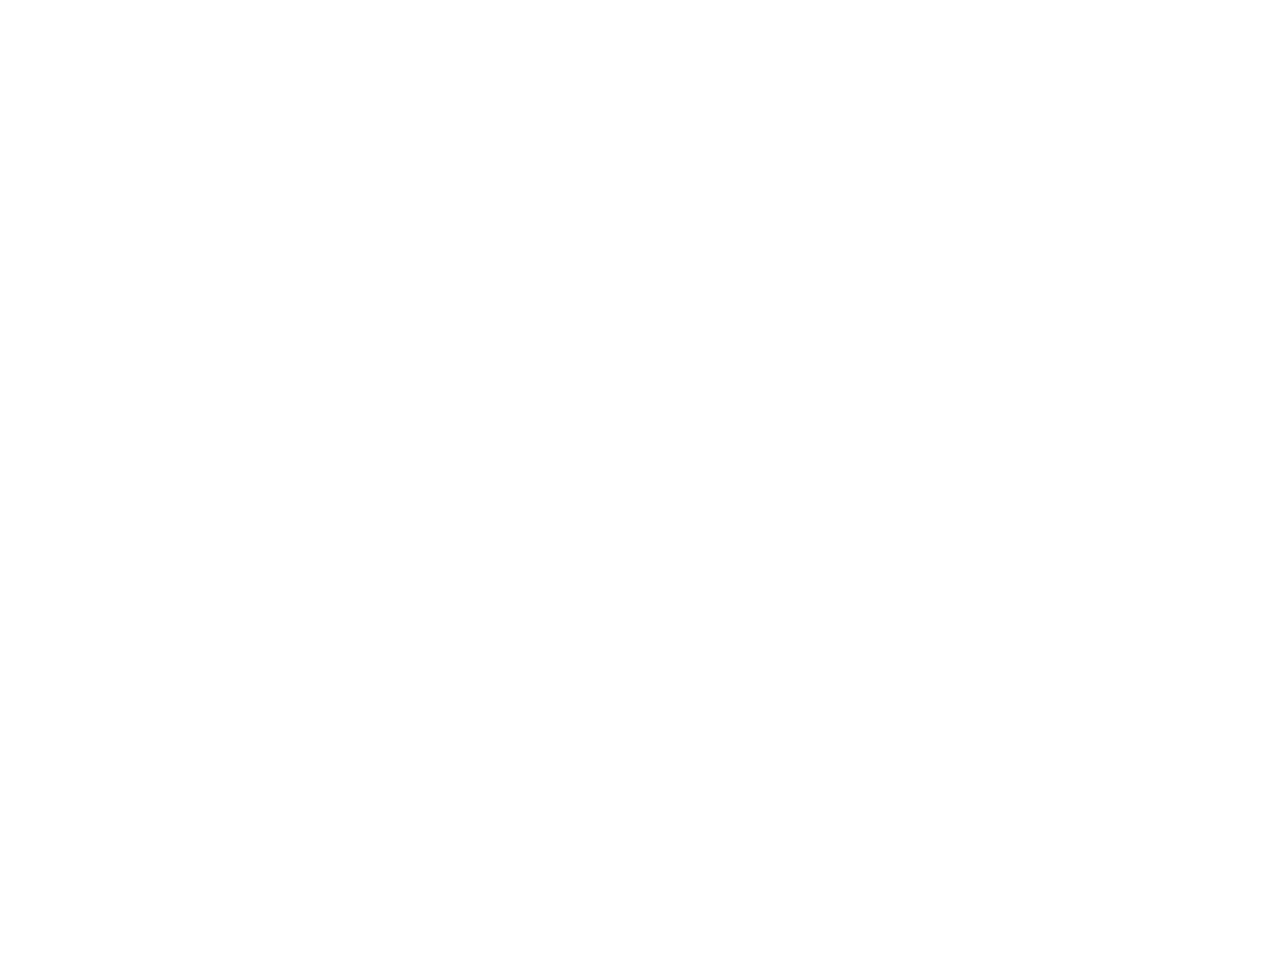

NameError: name 'YYhat' is not defined

In [34]:
plt.figure()
icelltype = 4
mn = np.minimum(YYhat[:,icelltype].min(),YY[:,icelltype].min())
mx = np.maximum(YYhat[:,icelltype].max(),YY[:,icelltype].max())
plt.subplot(1,2,1)
sca.show_size_contrast(YYhat[:,icelltype].reshape((nsize,ncontrast)),flipud=True,vmin=mn,vmax=mx)
plt.subplot(1,2,2)
sca.show_size_contrast((YY[:,icelltype]).reshape((nsize,ncontrast)),flipud=True,vmin=mn,vmax=mx)
plt.tight_layout()

In [234]:
XXp

array([[0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.]])

<IPython.core.display.Javascript object>


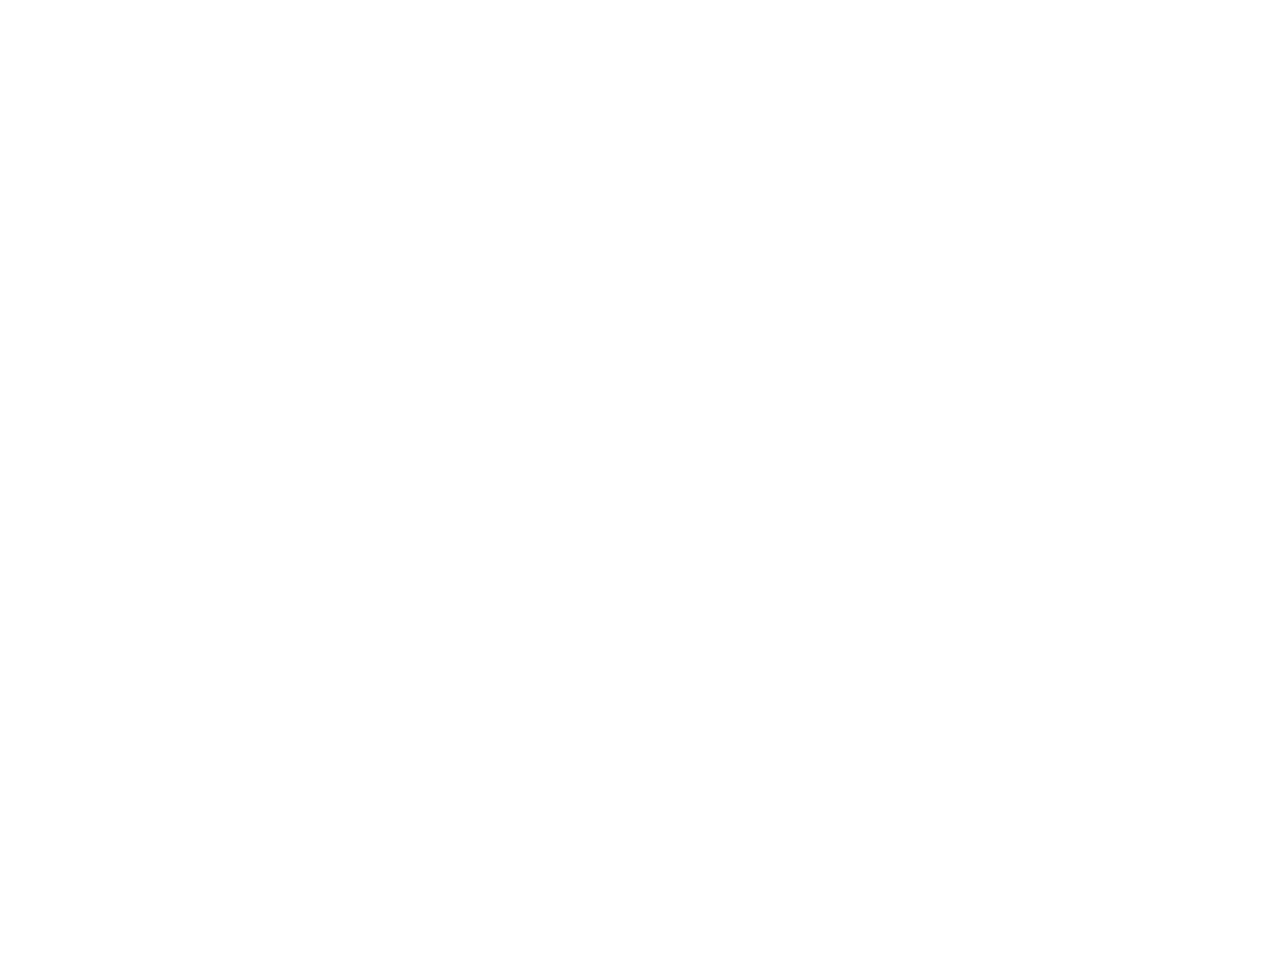

NameError: name 'XXhat' is not defined

In [35]:
plt.figure()
plt.scatter(XXhat.flatten(),XX.flatten())
plt.scatter(YYhat.flatten(),YY.flatten())

In [251]:
def compute_f_(Eta,Xi,s02):
    return utils.f_miller_troyer(Eta,Xi**2+np.concatenate((s02,s02),axis=0))
def compute_fprime_(Eta,Xi,s02):
    return utils.fprime_miller_troyer(Eta,Xi**2+np.concatenate((s02,s02),axis=0))*Xi
def sorted_r_eigs(w):
    drW,prW = np.linalg.eig(w)
    srtinds = np.argsort(drW)
    return drW[srtinds],prW[:,srtinds]

In [252]:
def fit_W_variability_no_YY_relaxed(Xhat,Xpc_list,Yhat,Ypc_list,pop_rate_fn=None,pop_deriv_fn=None,neuron_rate_fn=None,W0list=None,bounds=None,niter=10,wt_dict=None,eta=0.1):
    # X is (N,P), y is (N,Q). Finds wZx, wZy: (P,Q) + (Q,Q) weight matrices to explain Y as Y = f(Xwmx + Ywmy,Xwsx + Ywsy)
    # f is a static nonlinearity, given as a function
    
    Xpc_list = Xpc_list[0].copy()+Xpc_list[1].copy()
    Ypc_list = Ypc_list[0].copy()+Ypc_list[1].copy() # list of (npixels*Q) elements
    
    factr=1e7
    epsilon=1e-8
    pgtol=1e-5
    fudge = 1e-4
    noise = 1
    
#     f_sq_second_argument = lambda a,b: pop_rate_fn(a,b**2)
    fprime_m = pop_deriv_fn #utils.fprime_miller_troyer #egrad(pop_rate_fn,0)
#     fprime_s = egrad(f_sq_second_argument,1)
#     fprime_s2 = egrad(pop_rate_fn,1)
    
    YYhat = np.concatenate(Yhat,axis=1)
    XXhat = np.concatenate(Xhat,axis=1)
#     print(XXhat)
    
    nS = len(Yhat)
    assert(nS==len(Xhat))
    nN,nP = Xhat[0].shape
    nQ = Yhat[0].shape[1]
    assert(nN==Yhat[0].shape[0])
    
    def add_key_val(d,key,val):
        if not key in d:
            d[key] = val
    
    if wt_dict is None:
        wt_dict = {}
    add_key_val(wt_dict,'celltypes',np.ones((1,nS*nQ)))
    add_key_val(wt_dict,'inputs',np.concatenate([np.array((1,0)) for i in range(nS)],axis=0)[np.newaxis,:])
    add_key_val(wt_dict,'stims',np.ones((nN,1)))
    add_key_val(wt_dict,'X',1)
    add_key_val(wt_dict,'Y',1)
    add_key_val(wt_dict,'Eta',1)
    add_key_val(wt_dict,'Xi',1)
    add_key_val(wt_dict,'barrier',1)
    
    wtCell = wt_dict['celltypes']
    wtInp = wt_dict['inputs']
    wtStim = wt_dict['stims']
    wtX = wt_dict['X']
    wtY = wt_dict['Y']
    wtEta = wt_dict['Eta']
    wtXi = wt_dict['Xi']
    barrier_wt = wt_dict['barrier']
    
    first = True
        
#     lower_bound = np.array([b[0] for b in bounds])
#     upper_bound = np.array([b[1] for b in bounds])
        
    # Yhat is all measured tuning curves, Y is the averages of the model tuning curves
    def parse_W(W):
        # Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,YY,Eta,Xi
        shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ)]
        Ws = parse_thing(W,shapes)
        return Ws
    
    def parse_thing(V,shapes):
        for shape in shapes:
            if type(shape) is int:
                shape = (shape,)
        sizes = [np.prod(shape) for shape in shapes]
        sofar = 0
        outputs = []
        for size,shape in zip(sizes,shapes):
            if size > 1:
                new_element = V[sofar:sofar+size].reshape(shape)
            else:
                new_element = V[sofar] # if just a float
            outputs.append(new_element)
            sofar = sofar + size
        return outputs
    
    def unparse_W(*Ws):
        return np.concatenate([ww.flatten() for ww in Ws])
    
    def normalize(arr):
        arrsum = arr.sum(1)
        well_behaved = (arrsum>0)[:,np.newaxis]
        arrnorm = well_behaved*arr/arrsum[:,np.newaxis] + (~well_behaved)*np.ones_like(arr)/arr.shape[1]
        return arrnorm
    
    def gen_Weight(W,K,kappa):
        WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
        WW1 = np.concatenate((W*K[np.newaxis,:]*kappa,W),axis=1)
        WW = np.concatenate((WW0,WW1),axis=0)
        return WW
    
    def take_one_step(W0,eta):
        
#         print(first)
        # see derivations on pg. 77 of Notes VIII
#         def compute_siginv(stim_deriv,noise):
#             # stim_deriv (nN,), noise a scalar, giving the variance of measurement noise
#             # Sherman-Morrison formula to yield inv(sigma^2*eye + uuT)
#             uuT = np.outer(stim_deriv,stim_deriv)
#             uTu = np.inner(stim_deriv,stim_deriv)
#             siginv = 1/noise*(np.eye(nN) - uuT/(uTu + noise))
#             return siginv
        
        def inner_product_(a,b):
            return (a*b).sum(0)
#             if len(a.shape)==1:
#                 return a*b
#             else:
#                 return (a*b).sum(1)
    
        def compute_tr_siginv2_sig1(stim_deriv,noise,pc_list):
            # pc_list a list of PCs of the covariance matrix, each a tuple of (sigma,normed vector)
            tot = 0
            for icelltype in range(stim_deriv.shape[1]):
#                 sigma2 = np.linalg.norm(stim_deriv[:,icelltype])
                sigma2 = np.sum(stim_deriv[:,icelltype]**2)
#                 inner_prod = np.sum([pc[0]**2*sigma2**2*np.inner(stim_deriv[:,icelltype]/sigma2,pc[1]) for pc in pc_list[icelltype]])
                if sigma2>0:
                    inner_prod = np.sum([pc[0]**2*np.sqrt(sigma2)*inner_product_(stim_deriv[:,icelltype],pc[1]) for pc in pc_list[icelltype]])
                else:
                    inner_prod = 0 #np.zeros((nN,))
#                 print(inner_prod.sum())
#                 print(-1/noise/(noise + sigma2**2))
                tot = tot - 1/noise/(noise + sigma2)*inner_prod #.sum()
            return tot
        
        def compute_log_det_sig2(stim_deriv,noise):
#             sigma2 = np.linalg.norm(stim_deriv)
            sigma2 = inner_product_(stim_deriv,stim_deriv) #np.sum(stim_deriv**2,0)
            return np.sum([np.log(s2+noise) for s2 in sigma2])
        
        def compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model):
#             siginv2 = compute_siginv(stim_deriv,noise)
            # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) term contributes
            mu_dist = mu_model-mu_data
            inner_prod = inner_product_(stim_deriv,mu_dist) #np.einsum(stim_deriv,mu_dist,'ik,jk->ij')
#             sigma2 = np.linalg.norm(stim_deriv)
            sigma2 = inner_product_(stim_deriv,stim_deriv) #np.sum(stim_deriv**2,0)
#             print(mu_dist)
#             print(sigma2)
#             print(inner_prod)
#             print((inner_prod**2).sum())
#             print(-1/noise/(noise+sigma2**2))
            noise_term = 1/noise*inner_product_(mu_dist,mu_dist).sum() #np.inner(mu_dist,mu_dist)
            cov_term = np.sum([-1/noise/(noise+s2)*(ip**2).sum() for s2,ip in zip(sigma2,inner_prod)])
#             print([a for a in (noise_term,cov_term)])
            return noise_term + cov_term
        
        def compute_kl_divergence(stim_deriv,noise,mu_data,mu_model,pc_list):
            # omitting a few terms: - d - log(sig1) # where d is the dimensionality
            # in the case where stim_deriv = 0 (no variability model) only the noise (sqerror) 
            # term in mahalanobis_dist contributes
            log_det = compute_log_det_sig2(stim_deriv,noise)
            tr_sig_quotient = compute_tr_siginv2_sig1(stim_deriv,noise,pc_list)
            maha_dist = compute_mahalanobis_dist(stim_deriv,noise,mu_data,mu_model)
#             print('3 Parts of KL divergence: ')
#             for a in [log_det,tr_sig_quotient,maha_dist]:
#                 print(a)
#             print([a for a in [log_det,tr_sig_quotient,maha_dist]])
            return 0.5*(log_det + tr_sig_quotient + maha_dist)
#             return 0.5*(tr_sig_quotient)
        
        def compute_fprime_(Eta,Xi,s02):
#             Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi = parse_W(W)
#             WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
            return fprime_m(Eta,Xi**2+np.concatenate((s02,s02),axis=0))*Xi

        def compute_f_(Eta,Xi,s02):
            return pop_rate_fn(Eta,Xi**2+np.concatenate((s02,s02),axis=0))
        
        def minusLW(W):
            def u_fn(XX,YY,Wx,Wy,k,kappa):
                WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
                return XX @ WWx + YY @ WWy
            
            def compute_sq_error(a,b,wt):
                return (wt*(a-b)**2).sum()
            
            def compute_kl_error(mu_data,pc_list,mu_model,fprimeval,wt):
                # how to model variability in X?
                kl = compute_kl_divergence(fprimeval,noise,mu_data,mu_model,pc_list)
#                 print(kl.shape)
                return kl #wt*kl
                # principled way would be to use 1/wt for noise term. Should add later.
            
            Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = parse_W(W)
            
            fval = compute_f_(Eta,Xi,s02) # Eta the mean input per cell, Xi the stdev. input per cell, s02 the baseline variability in input
            fprimeval = compute_fprime_(Eta,Xi,s02)
#             print(fprimeval)
            
            Xterm = compute_kl_error(XXhat,Xpc_list,XX,XXp,wtStim*wtInp) # XX the modeled input layer (L4)
            Yterm = compute_kl_error(YYhat,Ypc_list,fval,fprimeval,wtStim*wtCell) # fval the modeled output layer (L2/3)
            Etaterm = compute_sq_error(Eta,u_fn(XX,fval,Wmx,Wmy,k,kappa),wtStim*wtCell) # magnitude of fudge factor in mean input
            Xiterm = compute_sq_error(Xi,u_fn(XX,fval,Wsx,Wsy,k,kappa),wtStim*wtCell) # magnitude of fudge factor in input variability
            # returns value float
#             print([a for a in [Xterm,Yterm,Etaterm,Xiterm]])
#             print('Four terms:')
#             for a in [Xterm,Yterm,Etaterm,Xiterm]:
#                 print(a)
            return wtX*Xterm + wtY*Yterm + wtEta*Etaterm + wtXi*Xiterm
    
        def minusdLdW(W): 
            # returns value (R,)
            # sum in first dimension: (N,1) times (N,1) times (N,P)
            return jacobian(minusLW)(W)
        
        def fix_violations(w,bounds):
            lb = np.array([b[0] for b in bounds])
            ub = np.array([b[1] for b in bounds])
            lb_violation = w<lb
            ub_violation = w>ub
            w[lb_violation] = lb[lb_violation]
            w[ub_violation] = ub[ub_violation]
            return w,lb_violation,ub_violation
        
        def sorted_r_eigs(w):
            drW,prW = np.linalg.eig(w)
            srtinds = np.argsort(drW)
            return drW[srtinds],prW[:,srtinds]
    
        def compute_eig_penalty_(Wmy,k0,kappa):
            # need to fix this to reflect addition of kappa argument
            Wsquig = gen_Weight(Wmy,k0,kappa)
#             npixels = 2
            drW,prW = sorted_r_eigs(Wsquig - np.eye(nQ*nS))
    #         dlW,plW = sorted_r_eigs(W0my.T - np.eye(nQ))
            plW = np.linalg.inv(prW)
#             print('stability: %.5f' % np.real(drW[-1]))
#             assert(np.real(drW[-1])<-1e-2) # most positive real and imag parts in last position
            eig_outer_all = [np.real(np.outer(plW[:,k],prW[k,:])) for k in range(nS*nQ)]
            eig_penalty_size_all = [barrier_wt/np.abs(np.real(drW[k])) for k in range(nS*nQ)]
            eig_penalty_dir_w = [eig_penalty_size*((eig_outer[:nQ,:nQ] + eig_outer[nQ:,nQ:]) + k0[np.newaxis,:]*(eig_outer[:nQ,nQ:] + kappa*eig_outer[nQ:,:nQ])) for eig_outer,eig_penalty_size in zip(eig_outer_all,eig_penalty_size_all)]
            eig_penalty_dir_k = [eig_penalty_size*((eig_outer[:nQ,nQ:] + eig_outer[nQ:,:nQ]*kappa)*W0my).sum(0) for eig_outer,eig_penalty_size in zip(eig_outer_all,eig_penalty_size_all)]
            eig_penalty_dir_kappa = [eig_penalty_size*(eig_outer[nQ:,:nQ]*k0[np.newaxis,:]*W0my).sum().reshape((1,)) for eig_outer,eig_penalty_size in zip(eig_outer_all,eig_penalty_size_all)]
#             for direction in [eig_penalty_dir_w,eig_penalty_dir_k,eig_penalty_dir_kappa]:
#                 direction = np.array(direction).sum(0)
            eig_penalty_dir_w = np.array(eig_penalty_dir_w).sum(0)
            eig_penalty_dir_k = np.array(eig_penalty_dir_k).sum(0)
            eig_penalty_dir_kappa = np.array(eig_penalty_dir_kappa).sum(0)
#             assert(True==False)
            # Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = parse_W(W)
#             print(eig_penalty_dir_w)
            return eig_penalty_dir_w,eig_penalty_dir_k,eig_penalty_dir_kappa
        
        def compute_eig_penalty(W):
            W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = parse_W(W)
            eig_penalty_dir_w,eig_penalty_dir_k,eig_penalty_dir_kappa = compute_eig_penalty_(W0my,k0,kappa0)
            eig_penalty_W = unparse_W(np.zeros_like(W0mx),eig_penalty_dir_w,np.zeros_like(W0sx),np.zeros_like(W0sy),np.zeros_like(s020),eig_penalty_dir_k,eig_penalty_dir_kappa,np.zeros_like(XX0),np.zeros_like(XXp0),np.zeros_like(Eta0),np.zeros_like(Xi0))
#             assert(True==False)
            return eig_penalty_W
        
        deriv = minusdLdW(W0) + compute_eig_penalty(W0)
#         print(minusLW(W0))
#         W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = parse_W(np.isnan(deriv))
        
#         assert(True==False)
                
        W1 = W0 - eta*deriv
        
        W1,lb_violation,ub_violation = fix_violations(W1,bounds)
        loss = minusLW(W1)
#         assert(True==False)
        
#         W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = parse_W(W1)
        
        return W1,loss
    
    W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0 = [w.copy() for w in W0list]
    
    Wmx   = np.zeros((niter+1,)+W0mx.shape)
    Wmy   = np.zeros((niter+1,)+W0my.shape)
    Wsx   = np.zeros((niter+1,)+W0sx.shape)
    Wsy   = np.zeros((niter+1,)+W0sy.shape)
    s02   = np.zeros((niter+1,)+s020.shape)
    k     = np.zeros((niter+1,)+k0.shape)
    kappa = np.zeros((niter+1,)+kappa0.shape)
    XX    = np.zeros((niter+1,)+XX0.shape)
    XXp   = np.zeros((niter+1,)+XXp0.shape)
    Eta   = np.zeros((niter+1,)+Eta0.shape)
    Xi    = np.zeros((niter+1,)+Xi0.shape)
    loss  = np.zeros((niter+1,))
    loss[0] = np.nan
        
#     print(W0.shape)
    
    diagnostics = [None]*(niter+1)
    iiter = 0
    thisW = Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],k[iiter],kappa[iiter],XX[iiter],XXp[iiter],Eta[iiter],Xi[iiter]
    thisW = [x.copy() for x in [W0mx,W0my,W0sx,W0sy,s020,k0,kappa0,XX0,XXp0,Eta0,Xi0]]
    W0 = unparse_W(*thisW).copy()
    
#     assert(True==False)
    
    if not isinstance(eta,np.ndarray):
        this_eta = eta*np.ones((niter+1,))
    else:
        this_eta = eta.copy()
        
    for iiter in range(1,niter+1):
#         print(iiter)
        W1,loss[iiter] = take_one_step(W0,this_eta[iiter])
        Wmx[iiter],Wmy[iiter],Wsx[iiter],Wsy[iiter],s02[iiter],k[iiter],kappa[iiter],XX[iiter],XXp[iiter],Eta[iiter],Xi[iiter] = [w.copy() for w in parse_W(W1)]
        if np.remainder(iiter,100)==0:
            print('loss: %.7f' % loss[iiter])
            Wsquig = gen_Weight(Wmy[iiter],k[iiter],kappa[iiter])
            drW,prW = sorted_r_eigs(Wsquig - np.eye(nQ*nS))
            print('stability: %.5f' % np.real(drW[-1]))
#             assert(np.real(drW[-1])<-1e-2)
        #         thisW = W1.copy()
        W0 = W1.copy()
        first = False
        
    Wt = [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi]
    
    return Wt,loss

In [156]:
kappa.shape

(1,)

In [43]:
nN = 30
nS = 2
nP = 2
nQ = 3

# code for bounds: 0 , constrained to 0
# +/-1 , constrained to +/-1
# 2 , constrained to [0,inf)
# -2 , constrained to (-inf,0]
# 3 , unconstrained

Wmx_bounds = 3*np.ones((nP,nQ),dtype=int)
Wmx_bounds[0,1] = 0

Wsx_bounds = 3*np.ones(Wmx_bounds.shape) #Wmx_bounds.copy()*0 #np.zeros_like(Wmx_bounds)

Wmy_bounds = 3*np.ones((nQ,nQ),dtype=int)
Wmy_bounds[1:3,1:3] = np.array(((0,-2),(-2,0)))
Wmy_bounds[1,0] = -2
Wmy_bounds[2,0] = 0

Wsy_bounds = 3*np.ones(Wmy_bounds.shape) #Wmy_bounds.copy()*0 #np.zeros_like(Wmy_bounds)

s02_bounds = np.ones((nQ,))

k_bounds = 2*np.ones((nQ,))

kappa_bounds = 2*np.ones((1,))

X_bounds = np.array([np.array([2,1,2,1])]*nN)

Xp_bounds = np.array([np.array([3,1,3,1])]*nN)

# Y_bounds = 2*np.ones((nN,nS*nQ))

Eta_bounds = 3*np.ones((nN,nS*nQ))

Xi_bounds = 3*np.ones((nN,nS*nQ))

In [44]:
# shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ),(nN,nS*nQ)]
shapes = [(nP,nQ),(nQ,nQ),(nP,nQ),(nQ,nQ),(nQ,),(nQ,),(1,),(nN,nS*nP),(nN,nS*nP),(nN,nS*nQ),(nN,nS*nQ)]
#         Wmx,    Wmy,    Wsx,    Wsy,    s02,  k,    kappa,XX,       XXp,       Eta,       Xi

lb = [-np.inf*np.ones(shp) for shp in shapes]
ub = [np.inf*np.ones(shp) for shp in shapes]
bdlist = [Wmx_bounds,Wmy_bounds,Wsx_bounds,Wsy_bounds,s02_bounds,k_bounds,kappa_bounds,X_bounds,Xp_bounds,Eta_bounds,Xi_bounds]

set_bound(lb,[bd==0 for bd in bdlist],val=0)
set_bound(ub,[bd==0 for bd in bdlist],val=0)

set_bound(lb,[bd==2 for bd in bdlist],val=0)

set_bound(ub,[bd==-2 for bd in bdlist],val=0)

set_bound(lb,[bd==1 for bd in bdlist],val=1)
set_bound(ub,[bd==1 for bd in bdlist],val=1)

set_bound(lb,[bd==-1 for bd in bdlist],val=-1)
set_bound(ub,[bd==-1 for bd in bdlist],val=-1)

# for bd in [lb,ub]:
#     for ind in [2,3]:
#         bd[ind][:,1] = 0

# temporary for no variation expt.
# lb[2] = np.zeros_like(lb[2])
# lb[3] = np.zeros_like(lb[3])
# lb[4] = np.ones_like(lb[4])
# lb[5] = np.zeros_like(lb[5])
# ub[2] = np.zeros_like(ub[2])
# ub[3] = np.zeros_like(ub[3])
# ub[4] = np.ones_like(ub[4])
# ub[5] = np.ones_like(ub[5])
# temporary for no variation expt.
lb = np.concatenate([a.flatten() for a in lb])
ub = np.concatenate([b.flatten() for b in ub])
bounds = [(a,b) for a,b in zip(lb,ub)]

In [45]:
nS = 2
ndims = 5
Yhat = [None for ialign in range(nS)]
Xhat = [None for ialign in range(nS)]
Ypc_list = [None for ialign in range(nS)]
Xpc_list = [None for ialign in range(nS)]
for ialign in range(nS):
    y = [utils.columnize(Rs[icelltype][ialign])[:,np.newaxis] for icelltype in range(1,4)]
    Ypc_list[ialign] = [None for icelltype in range(1,4)]
    for icelltype in range(1,4):
        rss = Rs[icelltype][ialign].reshape(Rs[icelltype][ialign].shape[0],-1)
        u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
        Ypc_list[ialign][icelltype-1] = [(s[idim],v[idim]) for idim in range(ndims)]
    Yhat[ialign] = np.concatenate(y,axis=1)
    x = utils.columnize(Rs[0][ialign])[:,np.newaxis]
    Xhat[ialign] = np.concatenate((x,np.ones_like(x)),axis=1)
    rss = Rs[0][ialign].reshape(Rs[0][ialign].shape[0],-1)
    u,s,v = np.linalg.svd(rss-rss.mean(0)[np.newaxis])
    Xpc_list[ialign] = [None for icelltype in range(2)]
    Xpc_list[ialign][0] = [(s[idim],v[idim]) for idim in range(ndims)]
    Xpc_list[ialign][1] = [(0,np.zeros((Xhat[0].shape[0],))) for idim in range(ndims)]
nN,nP = Xhat[0].shape
nQ = Yhat[0].shape[1]

In [253]:
from importlib import reload
reload(utils)
# W0list = [np.ones(shp) for shp in shapes]
wt_dict = {}
wt_dict['X'] = 10
wt_dict['Y'] = int(1e2)
wt_dict['Eta'] = 10 # 10
wt_dict['Xi'] = 10
wt_dict['stims'] = np.ones((30,1)) #(np.arange(30)/30)[:,np.newaxis]**1 #
wt_dict['barrier'] = 0.0 #10.0 #0.1
ntries = 1
nhyper = 1
niter = int(5e4)
learning_rate = 1e-5 #np.linspace(3e-4,1e-3,niter+1) # 1e-5
Wt = [[None for itry in range(ntries)] for ihyper in range(nhyper)]
loss = np.zeros((nhyper,ntries))
is_neg = np.array([b[1] for b in bounds])==0
counter = 0
negatize = [np.zeros(shp,dtype='bool') for shp in shapes]
for ishp,shp in enumerate(shapes):
    nel = np.prod(shp)
    negatize[ishp][:][is_neg[counter:counter+nel].reshape(shp)] = True
    counter = counter + nel
for ihyper in range(nhyper):
    for itry in range(ntries):
        print((ihyper,itry))
        W0list = [0.01*(ihyper+1)*np.random.rand(*shp) for shp in shapes]
        counter = 0
        for ishp,shp in enumerate(shapes):
            W0list[ishp][negatize[ishp]] = -W0list[ishp][negatize[ishp]]
        W0list[-4] = np.concatenate(Xhat,axis=1)
        W0list[-3] = np.zeros_like(W0list[-4])
        W0list[-2] = np.zeros(shapes[-2])
        W0list[-1] = np.zeros(shapes[-1])
        # wt_dict['Xi'] = 10
        # wt_dict['Eta'] = 10
        Wt_temp,loss_temp = fit_W_variability_no_YY_relaxed(Xhat,Xpc_list,Yhat,Ypc_list,pop_rate_fn=utils.f_miller_troyer,pop_deriv_fn=utils.fprime_miller_troyer,neuron_rate_fn=utils.evaluate_f_mt,W0list=W0list.copy(),bounds=bounds,niter=niter,wt_dict=wt_dict,eta=learning_rate)
        Wt[ihyper][itry] = [w[-1] for w in Wt_temp]
        loss[ihyper,itry] = loss_temp[-1]

(0, 0)
loss: 626.1316517
stability: -0.99186
loss: 597.7510642
stability: -0.98984
loss: 571.0099139
stability: -0.98819
loss: 545.8006538
stability: -0.98649
loss: 522.0308324
stability: -0.98478
loss: 499.6190702
stability: -0.98298
loss: 478.4900325
stability: -0.98106
loss: 458.5726379
stability: -0.97901
loss: 439.7975134
stability: -0.97680
loss: 422.0905148
stability: -0.97440
loss: 405.3504268
stability: -0.97177
loss: 389.3647001
stability: -0.96887
loss: 373.4825261
stability: -0.96563
loss: 355.3575950
stability: -0.96192
loss: 326.5829196
stability: -0.95767
loss: 263.5702664
stability: -0.95273
loss: 141.0554537
stability: -0.94671
loss: -6.3545314
stability: -0.93890
loss: -126.0475198
stability: -0.92877
loss: -210.5908395
stability: -0.91630
loss: -270.1815474
stability: -0.90245
loss: -313.7673646
stability: -0.88760
loss: -347.0038695
stability: -0.87201
loss: -373.3171932
stability: -0.85587
loss: -394.8226312
stability: -0.83936
loss: -412.8698320
stability: -0.8226

loss: -993.0593134
stability: 0.49982
loss: -993.3265156
stability: 0.50094
loss: -993.5907261
stability: 0.50205
loss: -993.8520042
stability: 0.50313
loss: -994.1104073
stability: 0.50420
loss: -994.3659911
stability: 0.50525
loss: -994.6188097
stability: 0.50629
loss: -994.8689156
stability: 0.50731
loss: -995.1163599
stability: 0.50831
loss: -995.3611920
stability: 0.50929
loss: -995.6034602
stability: 0.51026
loss: -995.8432113
stability: 0.51244
loss: -996.0804906
stability: 0.52241
loss: -996.3153425
stability: 0.52750
loss: -996.5478099
stability: 0.53161
loss: -996.7779345
stability: 0.53519
loss: -997.0057572
stability: 0.53844
loss: -997.2313173
stability: 0.54143
loss: -997.4546534
stability: 0.54423
loss: -997.6758030
stability: 0.54688
loss: -997.8948026
stability: 0.54940
loss: -998.1116875
stability: 0.55181
loss: -998.3264925
stability: 0.55413
loss: -998.5392512
stability: 0.55636
loss: -998.7499965
stability: 0.55852
loss: -998.9587602
stability: 0.56061
loss: -999.1

loss: -1019.8368497
stability: 0.74331
loss: -1019.9030827
stability: 0.74384
loss: -1019.9690953
stability: 0.74436
loss: -1020.0348885
stability: 0.74489
loss: -1020.1004636
stability: 0.74541
loss: -1020.1658218
stability: 0.74593
loss: -1020.2309641
stability: 0.74644
loss: -1020.2958916
stability: 0.74696
loss: -1020.3606054
stability: 0.74747
loss: -1020.4251064
stability: 0.74798
loss: -1020.4893958
stability: 0.74849
loss: -1020.5534745
stability: 0.74900
loss: -1020.6173434
stability: 0.74951
loss: -1020.6810034
stability: 0.75001
loss: -1020.7444554
stability: 0.75052
loss: -1020.8077003
stability: 0.75102
loss: -1020.8707389
stability: 0.75152
loss: -1020.9335721
stability: 0.75202
loss: -1020.9962006
stability: 0.75252
loss: -1021.0586252
stability: 0.75302
loss: -1021.1208467
stability: 0.75351
loss: -1021.1828658
stability: 0.75400
loss: -1021.2446832
stability: 0.75450
loss: -1021.3062997
stability: 0.75499
loss: -1021.3677158
stability: 0.75548
loss: -1021.4289322
stabi

In [246]:
pdb.pm()

> <ipython-input-244-845dc3b25002>(234)compute_eig_penalty_()
-> assert(np.real(drW[-1])<-1e-2) # most positive real and imag parts in last position
(Pdb) drW
array([-2.9945861 , -2.61753944, -1.99441069, -1.95418428, -0.04581572,
       -0.00558931])
(Pdb) exit


In [133]:
# [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,YY,Eta,Xi]
# nans: s02, XXp, Eta, Xi

In [254]:
drW,prW = np.linalg.eig(Wmy-np.eye(Wmy.shape[0]))

In [255]:
drW

array([-3.06977025, -0.10012245,  1.07642239])

<IPython.core.display.Javascript object>


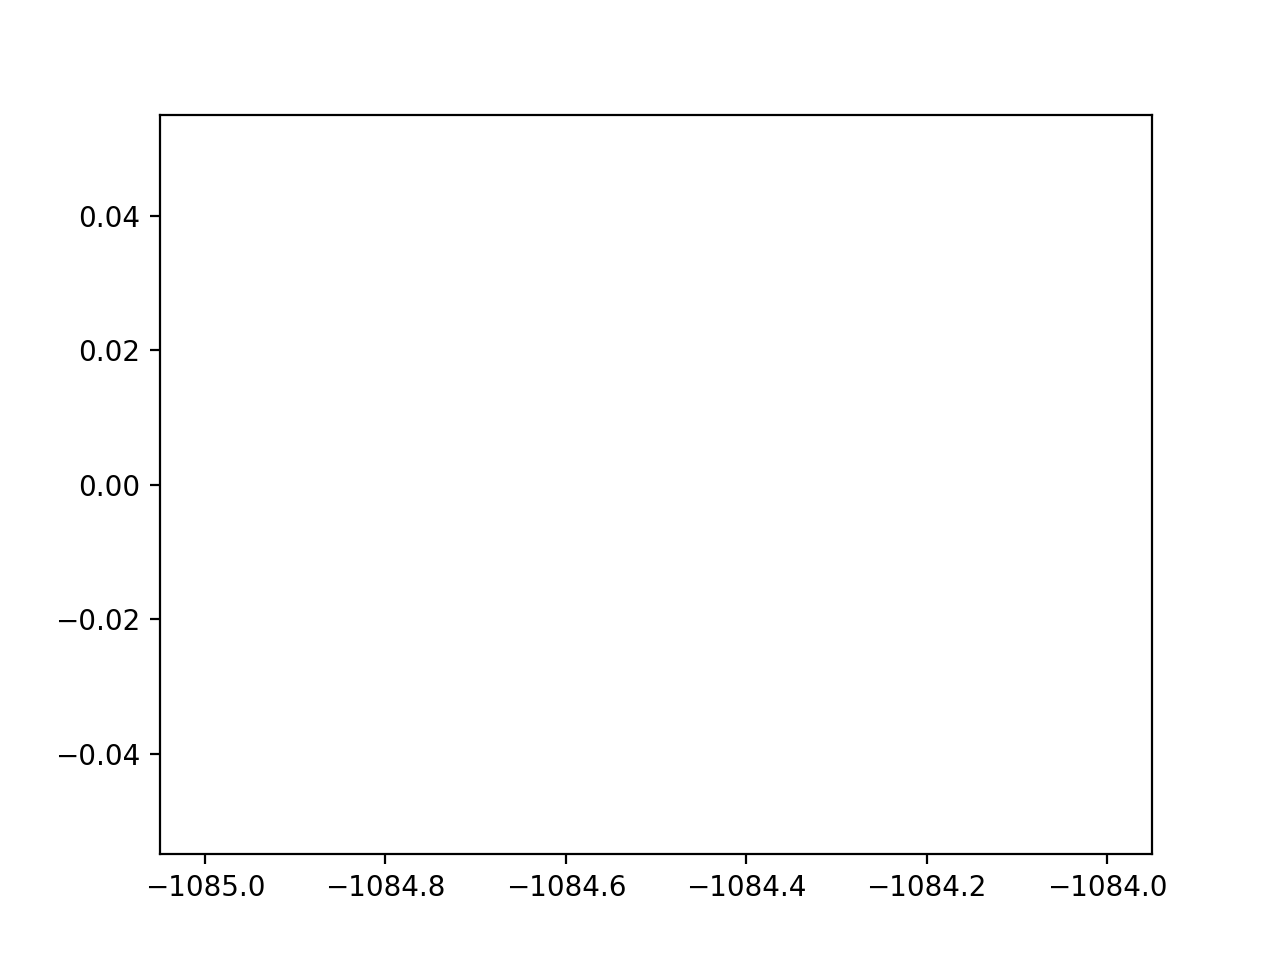

In [135]:
plt.figure()
bins = np.linspace(-1085,-1084,5)
plt.hist(loss.T,bins=bins)
trystars_i,trystars_j = np.where(loss<loss.min()+1) #2*loss.min())

<IPython.core.display.Javascript object>


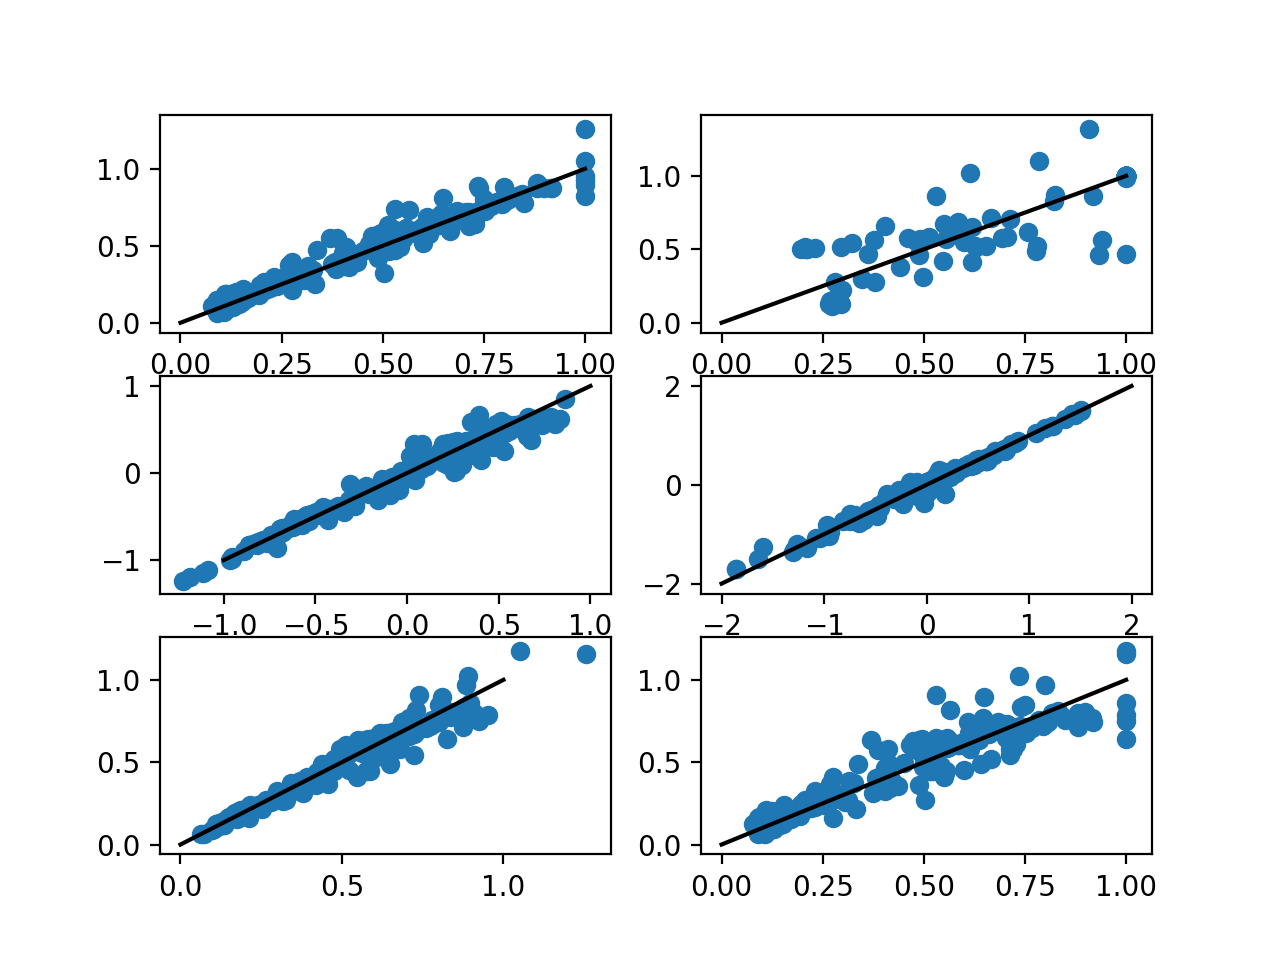

In [256]:
itry = 0
Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[trystars_i[itry]][trystars_j[itry]]
def gen_Weight(W,K,kappa):
    WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
    WW1 = np.concatenate((W*K[np.newaxis,:]*kappa,W),axis=1)
    WW = np.concatenate((WW0,WW1),axis=0)
    return WW
XXhat = np.concatenate(Xhat,axis=1)
YYhat = np.concatenate(Yhat,axis=1)
YY = compute_f_(Eta,Xi,s02)
Etastar = u_fn(XX,YY,Wmx,Wmy,k,kappa)
Xistar = u_fn(XX,YY,Wsx,Wsy,k,kappa)
YYstar = compute_f_(Etastar,Xistar,s02)
plt.figure()
nrows = 3
ncols = 2
plt.subplot(nrows,ncols,1)
plt.scatter(YYhat,YY)
plt.plot((0,1),(0,1),c='k')
plt.subplot(nrows,ncols,2)
plt.scatter(XXhat,XX)
plt.plot((0,1),(0,1),c='k')
plt.subplot(nrows,ncols,3)
plt.scatter(Eta,Etastar)
plt.plot((-1,1),(-1,1),c='k')
plt.subplot(nrows,ncols,4)
plt.scatter(Xi,Xistar)
plt.plot((-2,2),(-2,2),c='k')
plt.subplot(nrows,ncols,5)
plt.scatter(YY,YYstar)
plt.plot((0,1),(0,1),c='k')
plt.subplot(nrows,ncols,6)
plt.scatter(YYhat,YYstar)
plt.plot((0,1),(0,1),c='k')

In [257]:
ww = gen_Weight(Wmy,k,kappa)
eig_actual = np.zeros((Etastar.shape[0],))
for istim in range(Etastar.shape[0]):
    eig_actual[istim] = np.max(np.real(np.linalg.eig(compute_fprime_(Etastar,Xistar,s02)[istim]@ww - np.eye(ww.shape[0]))[0]))
    eig_no_gain = np.max(np.real(np.linalg.eig(ww - np.eye(ww.shape[0]))[0]))
    print((eig_actual[istim],eig_no_gain))

(-0.9999999999999998, 0.7778337542266334)
(-1.0, 0.7778337542266334)
(-0.9999999999999993, 0.7778337542266334)
(-0.268748623694248, 0.7778337542266334)
(1.4724006399571872, 0.7778337542266334)
(3.6903186323496104, 0.7778337542266334)
(-0.9999999999999996, 0.7778337542266334)
(-0.9999999999999998, 0.7778337542266334)
(-0.4792793664073132, 0.7778337542266334)
(0.8755448719503907, 0.7778337542266334)
(2.5623323562086675, 0.7778337542266334)
(4.315819362142701, 0.7778337542266334)
(-0.9999999999999997, 0.7778337542266334)
(-0.9999999999999999, 0.7778337542266334)
(0.12198245141214374, 0.7778337542266334)
(0.23404578522913497, 0.7778337542266334)
(0.3459062540136645, 0.7778337542266334)
(1.5650237543817527, 0.7778337542266334)
(-0.9999999999999998, 0.7778337542266334)
(-0.9999999999999997, 0.7778337542266334)
(-0.9999999999999996, 0.7778337542266334)
(-0.9999999999999998, 0.7778337542266334)
(-0.9999999999999998, 0.7778337542266334)
(-0.9999999999999992, 0.7778337542266334)
(-0.999999999999

<IPython.core.display.Javascript object>


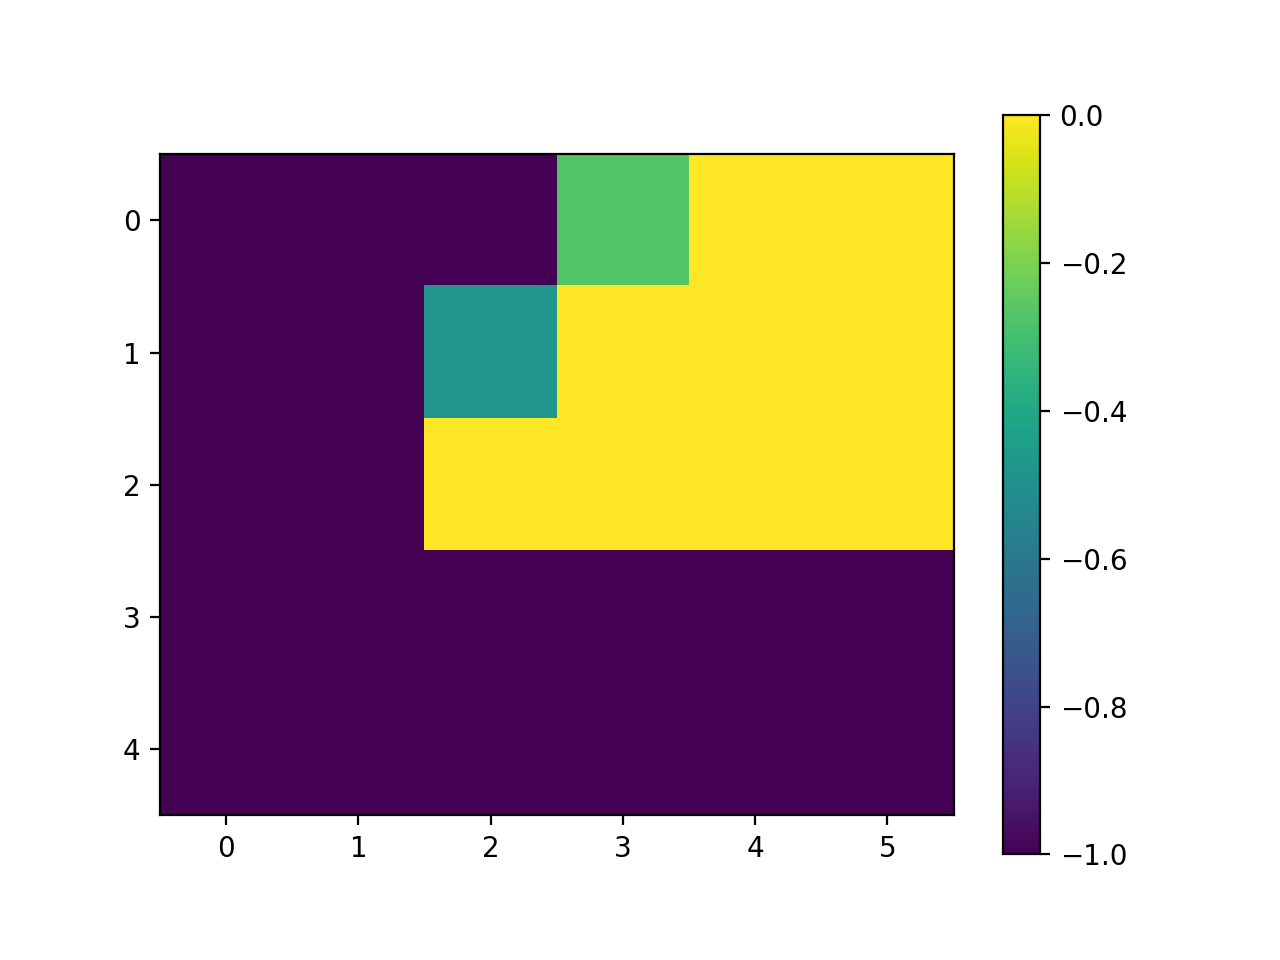

In [259]:
plt.figure()
plt.imshow(eig_actual.reshape((nsize,ncontrast)),vmin=-1,vmax=0)
plt.colorbar()

In [137]:
def u_fn(XX,YY,Wx,Wy,k,kappa):
    WWx,WWy = [gen_Weight(W,k,kappa) for W in [Wx,Wy]]
    return XX @ WWx + YY @ WWy

In [292]:
nstar = len(trystars_i)
YY = [None for istar in range(nstar)]
Nvals = 2
Niter = int(1e6)
for istar in (0,): #range(nstar):
    print(istar)
    ti,tj = trystars_i[istar],trystars_j[istar]
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[ti][tj]
    def fY(XX,YY):
        return compute_f_(u_fn(XX,YY,Wmx,Wmy,k,kappa),u_fn(XX,YY,Wsx,Wsy,k,kappa),s02)
    def predict_YY(XX,YY0,eta=1e-6):
        def dYYdt(YY):
            return -YY + fY(XX,YY)
        YY = np.zeros((Niter+1,nS*nQ))
        YY[0] = YY0.copy() #np.zeros((nN,nS*nQ))
        dYY = np.zeros_like(YY[0])
        iiter = 0
        while iiter < Niter: #np.abs(dYY).sum()>1e-8*np.abs(YY).sum():
            dYY = eta*dYYdt(YY[iiter])
            YY[iiter+1] = YY[iiter] + dYY
            iiter = iiter+1
        return YY
    YY = np.zeros((Nvals,Niter+1,nS*nQ))
    YY0 = compute_f_(Eta[0],Xi[0],s02)
    XX = np.ones((Nvals,4))
    XX[:,0] = np.linspace(0,1,Nvals)
    XX[:,2] = np.linspace(0,1,Nvals)
    YY[0] = predict_YY(XX[0],YY0)
    for ival in range(1,Nvals):
        print(ival)
        YY[ival] = predict_YY(XX[0],YY[ival-1,-1])

0
1


<IPython.core.display.Javascript object>


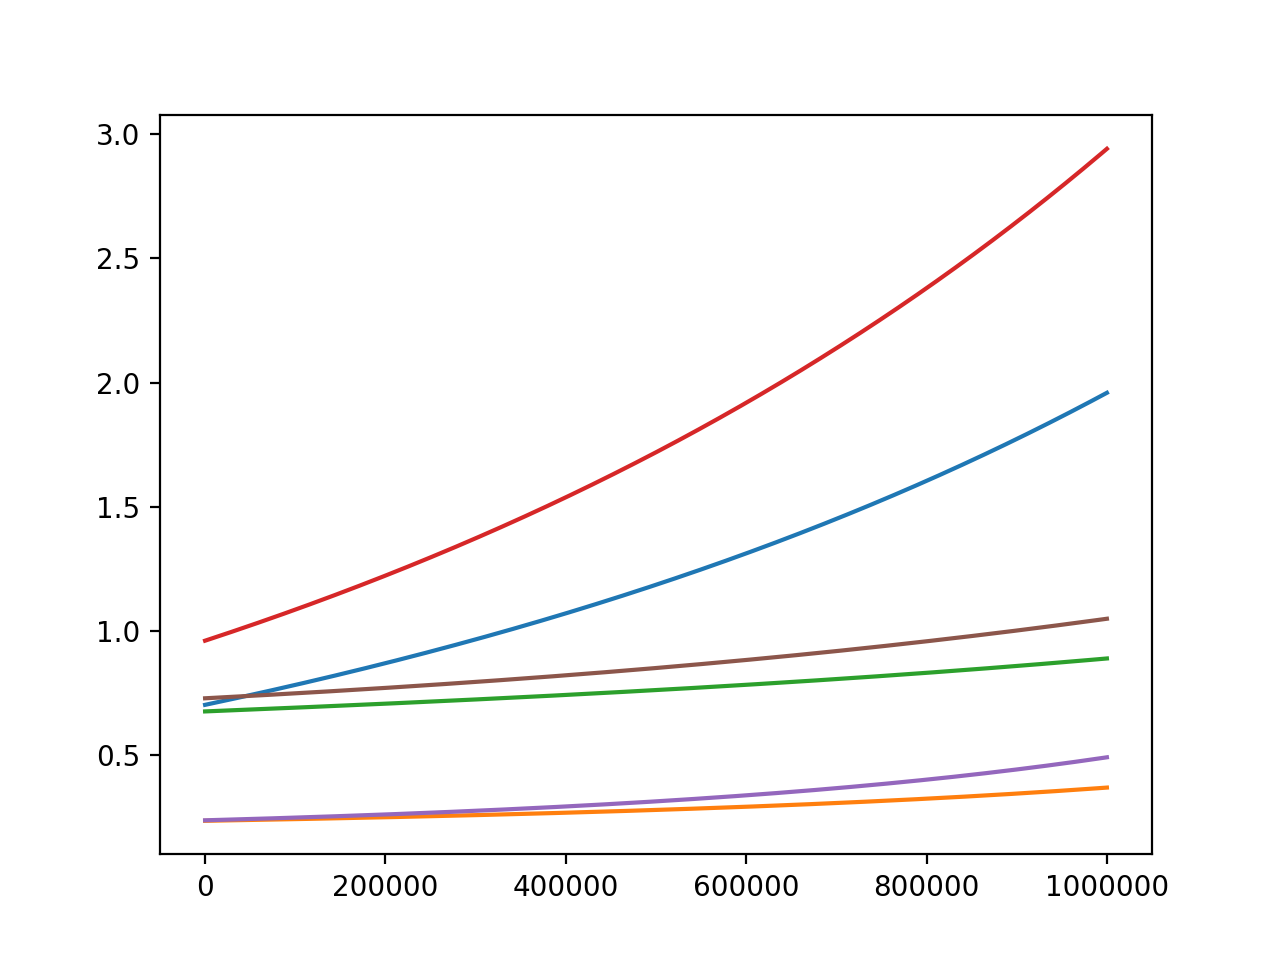

In [294]:
plt.figure()
plt.plot(YY[-1,:,:])

In [290]:
plt.close('all')

In [141]:
nstar = len(trystars_i)
YY_no_vip = [None for istar in range(nstar)]
Nvals = 100
for istar in range(nstar):
    print(istar)
    ti,tj = trystars_i[istar],trystars_j[istar]
    Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,XXp,Eta,Xi = Wt[ti][tj]
    print(np.max(np.linalg.eig(Wmy)[0])-1)

0
1.103639282179607


In [122]:
plt.figure()
plt.plot()

array([3.30945644e+000, 3.49994123e+001, 3.56447218e+002, 3.61617953e+003,
       3.66683723e+004, 3.71797207e+005, 3.76979047e+006, 3.82232738e+007,
       3.87559599e+008, 3.92960691e+009, 3.98437053e+010, 4.03989735e+011,
       4.09619799e+012, 4.15328325e+013, 4.21116405e+014, 4.26985149e+015,
       4.32935681e+016, 4.38969141e+017, 4.45086684e+018, 4.51289481e+019,
       4.57578722e+020, 4.63955611e+021, 4.70421369e+022, 4.76977235e+023,
       4.83624465e+024, 4.90364331e+025, 4.97198125e+026, 5.04127156e+027,
       5.11152751e+028, 5.18276256e+029, 5.25499035e+030, 5.32822472e+031,
       5.40247970e+032, 5.47776950e+033, 5.55410855e+034, 5.63151148e+035,
       5.70999311e+036, 5.78956847e+037, 5.87025280e+038, 5.95206156e+039,
       6.03501043e+040, 6.11911528e+041, 6.20439223e+042, 6.29085761e+043,
       6.37852799e+044, 6.46742015e+045, 6.55755113e+046, 6.64893819e+047,
       6.74159884e+048, 6.83555082e+049, 6.93081212e+050, 7.02740101e+051,
       7.12533597e+052, 7

<IPython.core.display.Javascript object>


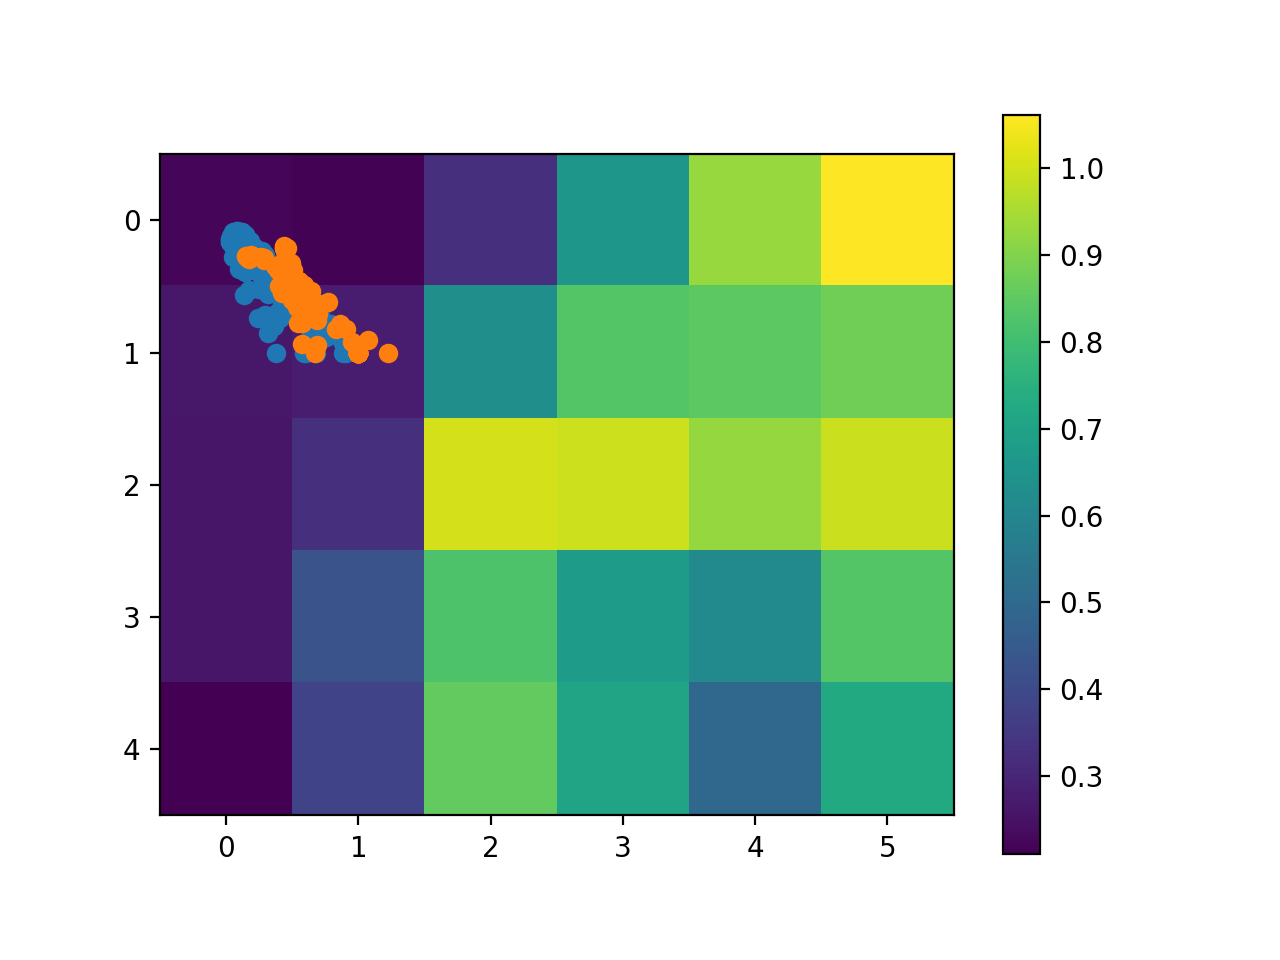

In [90]:
icelltype = 2
ispatial = 0
yypc = YYhat[:,3*ispatial+icelltype] + 1*Ypc_list[ispatial][icelltype][0][0]*Ypc_list[ispatial][icelltype][0][1]
plt.figure()
plt.imshow(yypc.reshape((5,6)))
plt.colorbar()

<IPython.core.display.Javascript object>


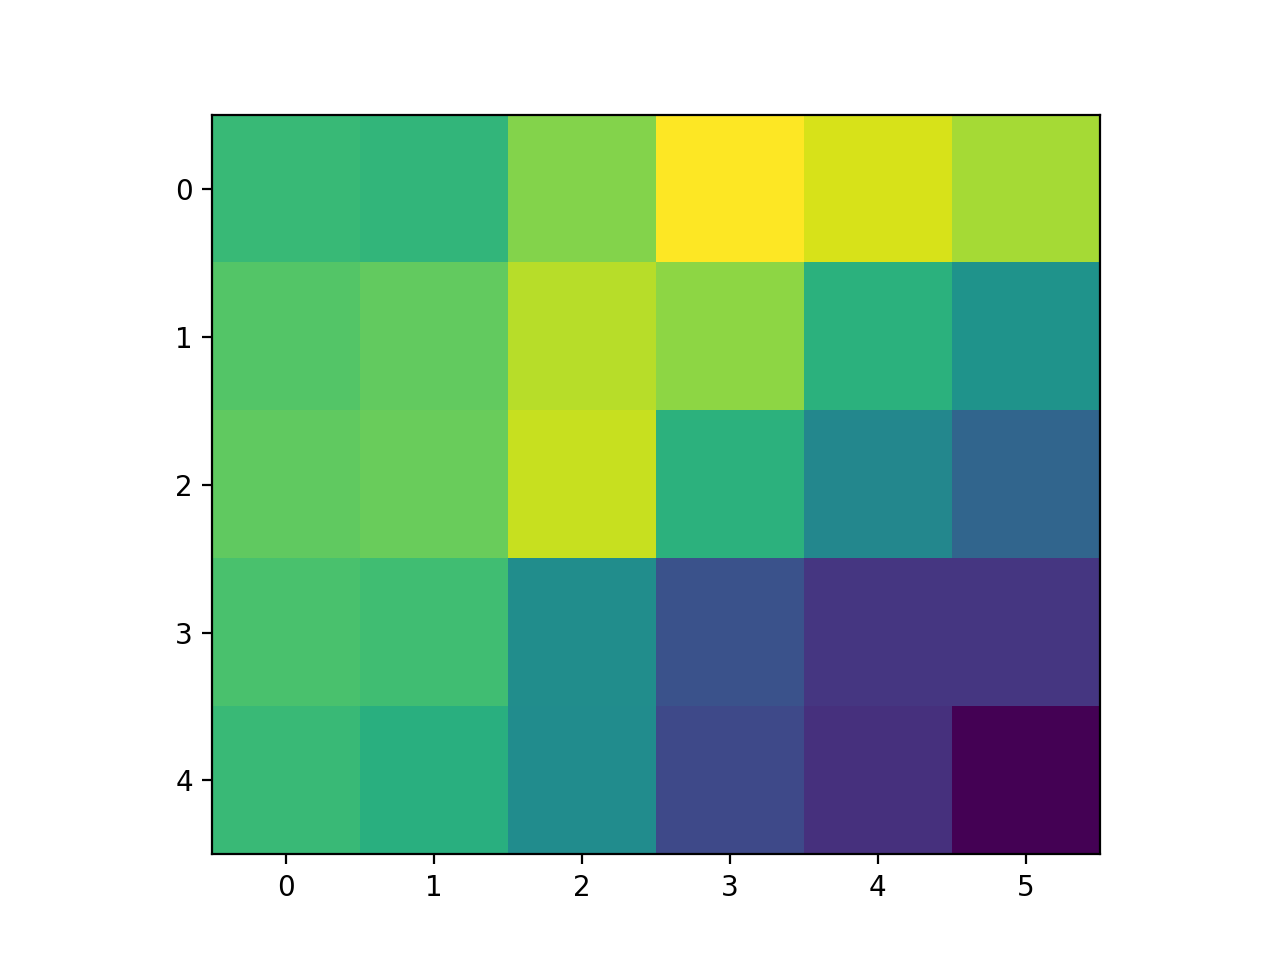

<IPython.core.display.Javascript object>


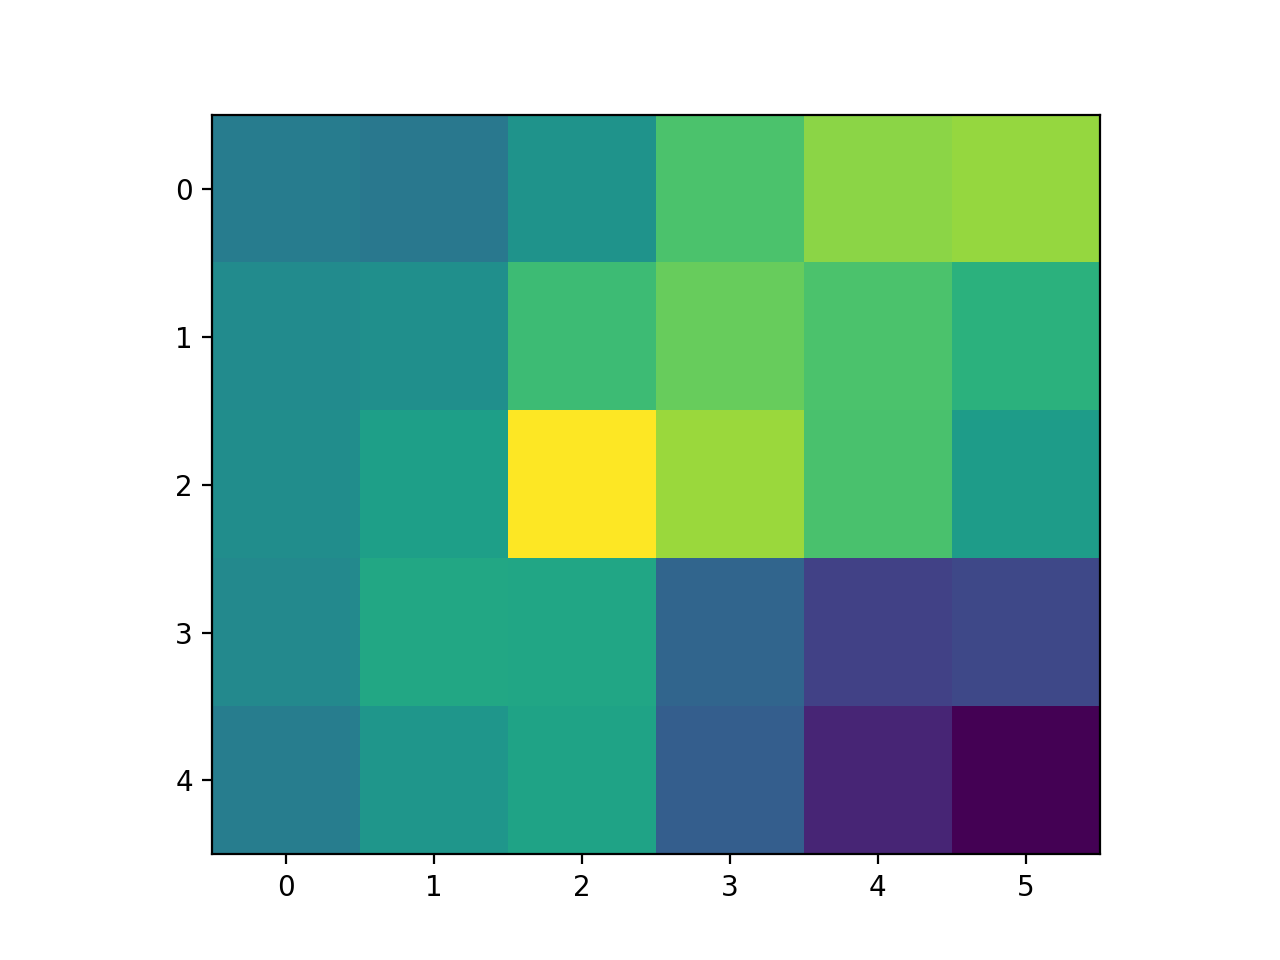

<IPython.core.display.Javascript object>


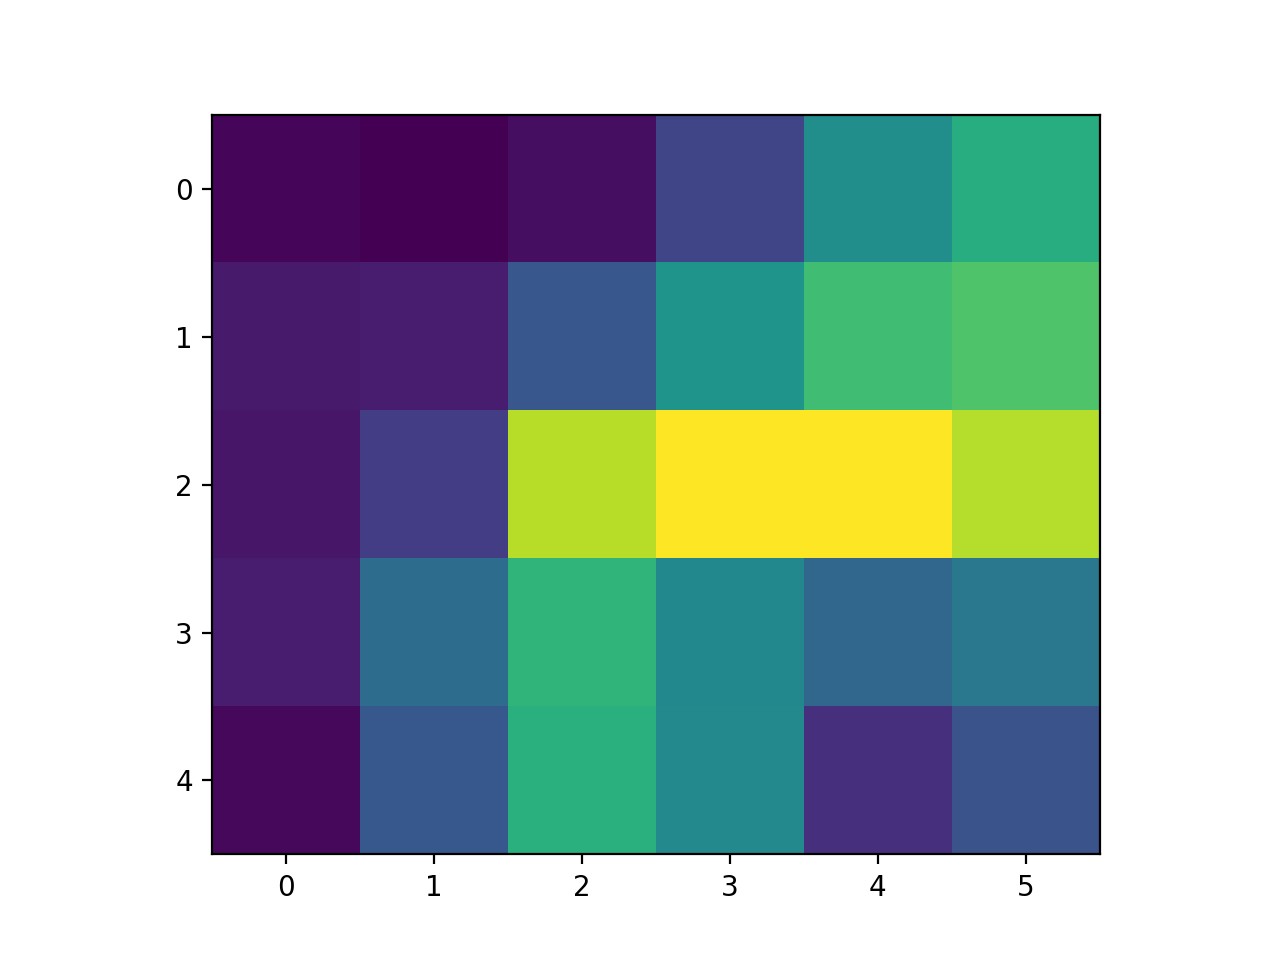

In [79]:
for q in (-1,0,1):
    plt.figure()
    YY = compute_f_(Eta+q*Xi,np.zeros_like(Xi),s02)
    plt.imshow(YY[:,2].reshape((5,6)))

<IPython.core.display.Javascript object>


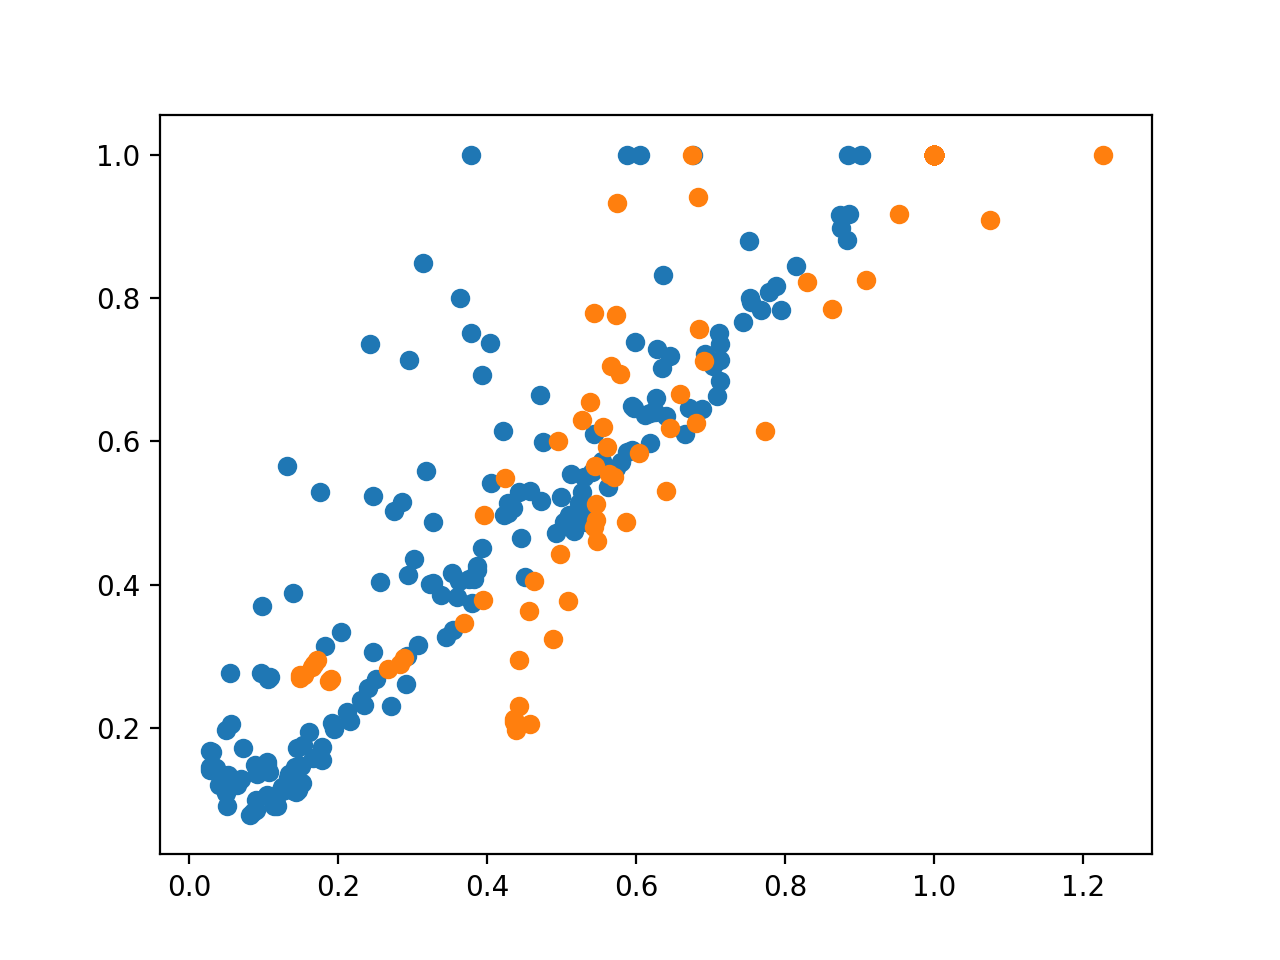

In [92]:
plt.figure()
plt.scatter(YY,YYhat)
plt.scatter(XX,XXhat)

In [192]:
# plt.figure()
# plt.scatter([w[1][0,0] for w in Wt],[w[0][0,2] for w in Wt])
# plt.scatter([w[1][0,2] for w in Wt],[w[1][0,1] for w in Wt])
# plt.scatter([w[1][2,1] for w in Wt],[w[1][1,2] for w in Wt])
# plt.scatter([w[1][2,1] for w in Wt],[w[1][1,0] for w in Wt])

TypeError: list indices must be integers or slices, not tuple

<Figure size 432x288 with 0 Axes>

In [399]:
# ws = np.array([np.concatenate([ww.flatten() for ww in w]) for w in Wt])

In [400]:
# plt.figure()
# plt.imshow(ws[:,:10],extent=[0,1,0,1])

In [49]:
nstar = len(trystars_i)
YY_no_vip = [None for istar in range(nstar)]
YY_no_sst = [None for istar in range(nstar)]
for istar in range(nstar):
    print(istar)
    ti,tj = trystars_i[istar],trystars_j[istar]
    [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = Wt[ti][tj]
    resEta = Eta - u_fn(XX,YY,Wmx,Wmy,k,kappa)
    resXi = Xi - u_fn(XX,YY,Wsx,Wsy,k,kappa)
    resY = YY - compute_f_(Eta,Xi,s02)
    def fY(XX,YY,resEta,resXi,resY):
        return compute_f_(u_fn(XX,YY,Wmx,Wmy,k,kappa)+resEta,u_fn(XX,YY,Wsx,Wsy,k,kappa)+resXi,s02)+resY
    def thisfY(YY0):
        return fY(XX,YY0,resEta,resXi,resY)
    def predict_YY_silencing(YY0,XX,resEta,resXi,resY,silenced,eta=1e-4):
        def dYYdt(YY):
            return -YY + thisfY(YY)
        YY = YY0.copy() #np.zeros((nN,nS*nQ))
        dYY = np.ones_like(YY)
        iiter = 0
        while iiter < 1e4: #np.abs(dYY).sum()>1e-8*np.abs(YY).sum():
            iiter = iiter+1
            dYY = eta*dYYdt(YY)
            YY = YY + dYY
            YY[:,silenced] = 0
        return YY
    silenced = np.array((0,0,1,0,0,1),dtype='bool')
    YY_no_vip[istar] = predict_YY_silencing(YY,XX,resEta,resXi,resY,silenced)
    silenced = np.array((0,1,0,0,1,0),dtype='bool')
    YY_no_sst[istar] = predict_YY_silencing(YY,XX,resEta,resXi,resY,silenced)

0
1
2


/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarn

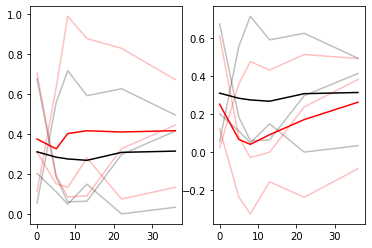

In [50]:
plt.figure()
alpha1 = 0.25
ic = 0
icontrast = 5
colors = ['k','r']
def norm01(arr):
    return (arr-arr.min())/(arr.max()-arr.min())
for istar in range(nstar):
    ti,tj = trystars_i[istar],trystars_j[istar]
    [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = Wt[ti][tj]
    plt.subplot(1,2,1)
    usize0 = (0,5,8,13,22,36)
    sc = YY[:,ic].reshape((nsize,ncontrast))
    to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
    if istar == 0:
        avg_curves = np.zeros((2,2,)+to_plot.shape)
    avg_curves[0,0] = avg_curves[0,0] + to_plot/nstar
    plt.plot(usize0,to_plot,c=colors[0],alpha=alpha1)
    sc = YY_no_sst[istar][:,ic].reshape((nsize,ncontrast))
    to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
    avg_curves[0,1] = avg_curves[0,1] + to_plot/nstar
    plt.plot(usize0,to_plot,c=colors[1],alpha=alpha1)
    plt.subplot(1,2,2)
    usize0 = (0,5,8,13,22,36)
    sc = YY[:,ic].reshape((nsize,ncontrast))
    to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
    avg_curves[1,0] = avg_curves[1,0] + to_plot/nstar
    plt.plot(usize0,to_plot,c=colors[0],alpha=alpha1)
    sc = YY_no_vip[istar][:,ic].reshape((nsize,ncontrast))
    to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
    avg_curves[1,1] = avg_curves[1,1] + to_plot/nstar
    plt.plot(usize0,to_plot,c=colors[1],alpha=alpha1)
for imanip in range(2):
    plt.subplot(1,2,imanip+1)
    plt.plot(usize0,avg_curves[imanip,0],c=colors[0])
    plt.plot(usize0,avg_curves[imanip,1],c=colors[1])
    

In [463]:
to_plots

[array([0, 6]), array([0, 6])]

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


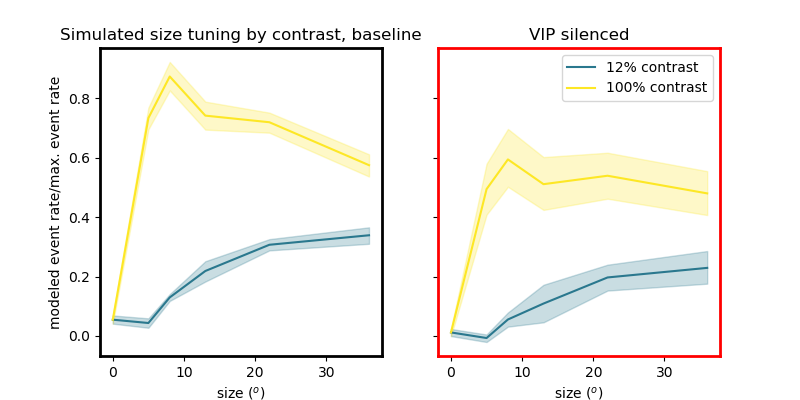

In [484]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(8,4))
alpha1 = 0.25
ic = 0
icontrasts = [2,5]
colors = ['k','r']
colors = plt.cm.viridis(np.linspace(0,1,6))
def norm01(arr):
    return (arr-arr.min())/(arr.max()-arr.min())
for icontrast in icontrasts:
    for istar in range(nstar):
        ti,tj = trystars_i[istar],trystars_j[istar]
        [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = Wt[ti][tj]
        usize0 = (0,5,8,13,22,36)
        sc = YY[:,ic].reshape((nsize,ncontrast))
        to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
        if istar == 0:
            avg_curves = np.zeros((2,2,)+to_plot.shape)
            to_plots = [np.zeros((0,)+to_plot.shape) for il in range(2)]
        avg_curves[1,0] = avg_curves[1,0] + to_plot/nstar
#         plt.subplot(1,2,1)
        to_plots[0] = np.concatenate((to_plots[0],to_plot[np.newaxis]))
#         plt.plot(usize0,to_plot,c=colors[icontrast],alpha=alpha1)
        sc = YY_no_vip[istar][:,ic].reshape((nsize,ncontrast))
        to_plot = np.concatenate(((sc[:,0].mean(),),sc[:,icontrast]))
        avg_curves[1,1] = avg_curves[1,1] + to_plot/nstar
#         plt.subplot(1,2,2)
#         plt.plot(usize0,to_plot,c=colors[icontrast],alpha=alpha1)
        to_plots[1] = np.concatenate((to_plots[1],to_plot[np.newaxis]))
    for il in range(2):
#         plt.subplot(1,2,il+1)
        axes[il].plot(usize0,avg_curves[1,il],c=colors[icontrast])
        lb,ub = ut.bootstrap(to_plots[il],pct=(16,84),fn=np.nanmean,axis=0)
        axes[il].fill_between(usize0,lb,ub,color=colors[icontrast],alpha=alpha1)
# plt.subplot(1,2,1)
# plt.title('Center-aligned, response to 12% contrast')
# plt.subplot(1,2,1)
axes[0].set_ylabel('modeled event rate/max. event rate')
axes[0].set_xlabel('size ($^o$)')
axes[1].set_xlabel('size ($^o$)')
plt.setp(axes[0].spines.values(),color='k',linewidth=2)
plt.setp(axes[1].spines.values(),color='r',linewidth=2)
axes[0].set_title('Simulated size tuning by contrast, baseline')
axes[1].set_title('VIP silenced')
axes[1].legend(['12% contrast','100% contrast'])
plt.savefig('figures/modeled_vip_halo_size_tuning_by_contrast_fill_between.jpg',dpi=300)

In [428]:
(ti,),(tj,) = np.where(loss==np.min(loss)) #2*loss.min()
[Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = Wt[ti][tj]

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


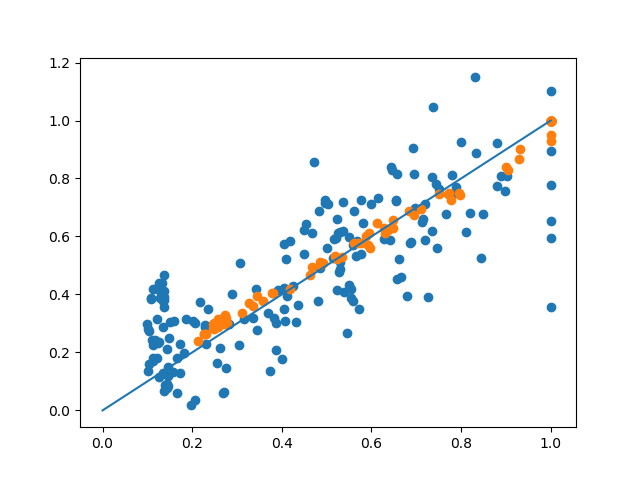

In [429]:
plt.figure()
XXhat = np.concatenate(Xhat,axis=1)
YYhat = np.concatenate(Yhat,axis=1)
plt.scatter(YYhat.flatten(),YY.flatten())
plt.scatter(XXhat.flatten(),XX.flatten())
plt.plot((0,1),(0,1))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


<IPython.core.display.Javascript object>


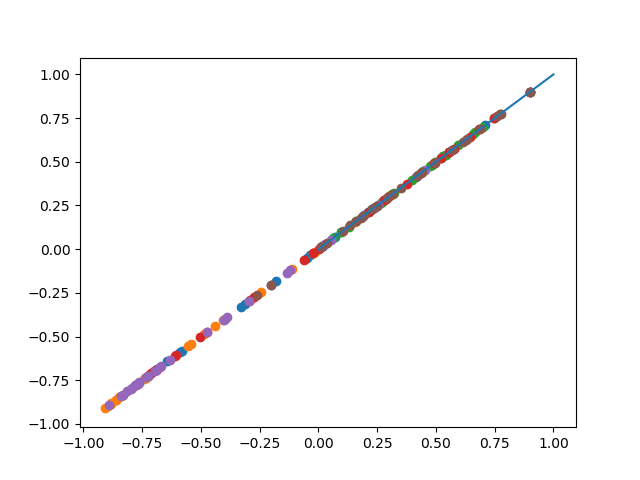

In [430]:
Etas = u_fn(XX,YY,Wmx,Wmy,k,kappa)
plt.figure()
for ic in range(6):
    plt.scatter(Eta[:,ic],Etas[:,ic])
plt.plot((0,1),(0,1))

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


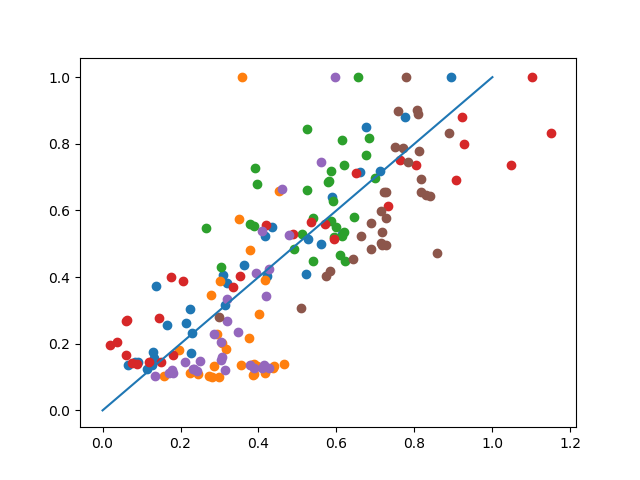

In [431]:
plt.figure()
YYs = compute_f_(Eta,Xi,s02)
for ic in range(6):
    plt.scatter(YY[:,ic],YYs[:,ic])
plt.plot((0,1),(0,1))

<IPython.core.display.Javascript object>


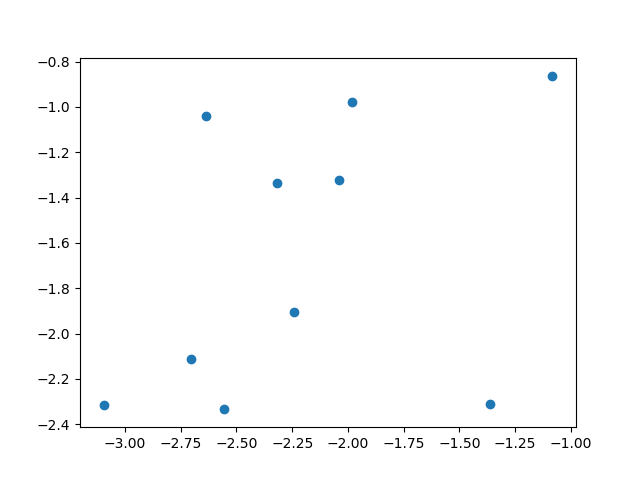

In [291]:
plt.figure()
plt.scatter(wmys[:,1,0],wmys[:,2,1])

In [514]:
wmys = np.concatenate([w[1][np.newaxis] for w in np.concatenate(Wt)],axis=0)
# trystar = np.argmax(wmys[:,1,0]*wmys[:,2,1])
# trystar = np.argmin(loss)

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


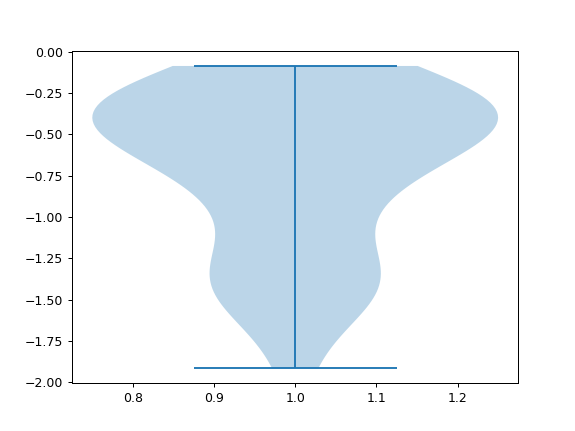

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f1bdc083a90>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f1bdb9cec50>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f1bdc083790>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f1bdc083990>}

In [516]:
plt.figure()
plt.violinplot(wmys[:,1,0])

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


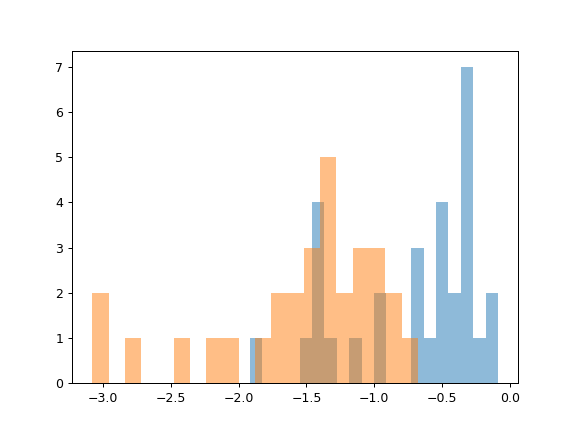

(array([2., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 2., 2., 3., 5., 2., 3.,
        3., 2., 1.]),
 array([-3.08046601, -2.96038626, -2.84030651, -2.72022677, -2.60014702,
        -2.48006727, -2.35998753, -2.23990778, -2.11982804, -1.99974829,
        -1.87966854, -1.7595888 , -1.63950905, -1.51942931, -1.39934956,
        -1.27926981, -1.15919007, -1.03911032, -0.91903057, -0.79895083,
        -0.67887108]),
 <a list of 20 Patch objects>)

In [515]:
plt.figure()
plt.hist(wmys[:,1,0],bins=20,alpha=0.5)
plt.hist(wmys[:,2,1],bins=20,alpha=0.5)

In [518]:
ws = [np.concatenate([w[q][np.newaxis] for w in np.concatenate(Wt)],axis=0) for q in range(len(Wt[0][0]))]
[Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = ws

In [541]:
ws = [np.concatenate([Wt[ti][tj][q][np.newaxis] for ti,tj in zip(trystars_i,trystars_j)],axis=0) for q in range(len(Wt[0][0]))]
[Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = ws

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


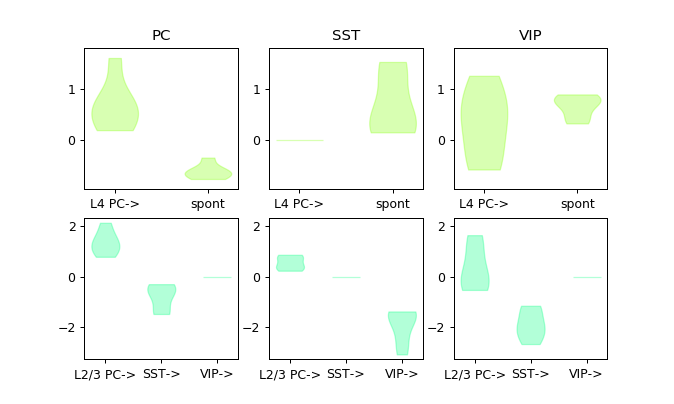

In [552]:
# ws = [np.concatenate([w[q][np.newaxis] for w in np.concatenate(Wt)],axis=0) for q in range(len(Wt[0][0]))]
# [Wmx,Wmy,Wsx,Wsy,s02,k,kappa,XX,YY,Eta,Xi] = ws
plt.figure(figsize=(7.5,4.5))
for datas in [[Wmx,Wmy]]:#,[Wsx,Wsy]]:
    titles = ['PC','SST','VIP']
    data = datas[0]
    x = np.arange(1,data.shape[1]+1)
    xlbl = ['L4 PC->','spont']
    for icelltype in range(3):
        plt.subplot(2,3,icelltype+1)
        violin_parts = plt.violinplot([data[:,i,icelltype] for i in range(data.shape[1])],showextrema=False)
        for pc in violin_parts['bodies']:
            pc.set_facecolor([0.5,1,0.0])
            pc.set_edgecolor([0.5,1,0.0])
        plt.xticks(x,xlbl)
        plt.ylim(data.min()-0.2,data.max()+0.2)
        plt.title(titles[icelltype])
#     plt.figure(figsize=(7.5,2))
    data = datas[1]
    x = np.arange(1,data.shape[1]+1)
    xlbl = ['L2/3 PC->','SST->','VIP->']
    for icelltype in range(3):
        plt.subplot(2,3,3+icelltype+1)
#         plt.violinplot([data[:,i,icelltype] for i in range(data.shape[1])])
        violin_parts = plt.violinplot([data[:,i,icelltype] for i in range(data.shape[1])],showextrema=False)
        for pc in violin_parts['bodies']:
            pc.set_facecolor([0.0,1,0.5])
            pc.set_edgecolor([0.0,1,0.5])
        plt.xticks(x,xlbl)
        plt.ylim(data.min()-0.2,data.max()+0.2)
#         plt.title(titles[icelltype])
plt.savefig('violinplots_fit_weights.jpg',dpi=300)

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


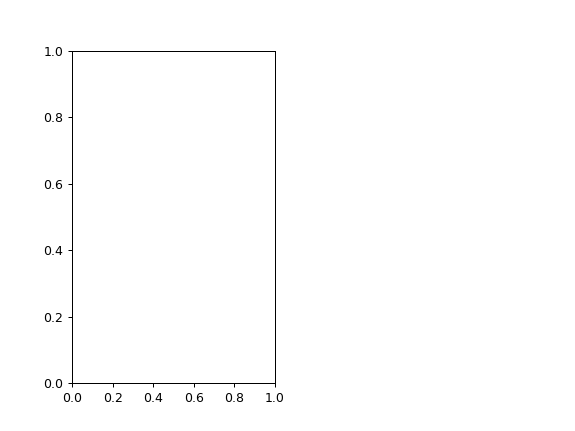

TypeError: list indices must be integers or slices, not tuple

In [543]:
plt.figure()
plt.subplot(1,2,1)
for ic in (0,):
    sca.scatter_size_contrast(YY[:,ic],YY_no_vip[:,ic])
    plt.plot((0,1),(0,1),c='k')
plt.axis('equal')
plt.subplot(1,2,2)
for ic in (0,):
    sca.scatter_size_contrast(YY[:,ic],YY_no_sst[:,ic])
    plt.plot((0,1),(0,1),c='k')
plt.axis('equal')

<IPython.core.display.Javascript object>


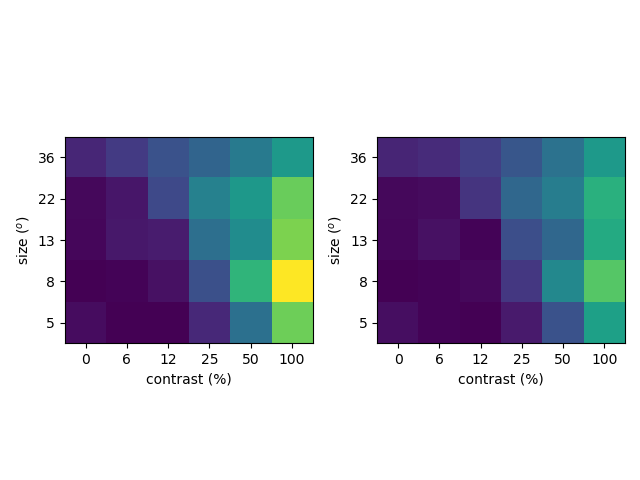

In [327]:
plt.figure()
ic = 0
plt.subplot(1,2,1)
sca.show_size_contrast(YY[:,ic].reshape((nsize,ncontrast)),flipud=True,vmax=YY[:,ic].max())
plt.subplot(1,2,2)
sca.show_size_contrast(YY_no_vip[:,ic].reshape((nsize,ncontrast)),flipud=True,vmax=YY[:,ic].max())
plt.tight_layout()

<IPython.core.display.Javascript object>


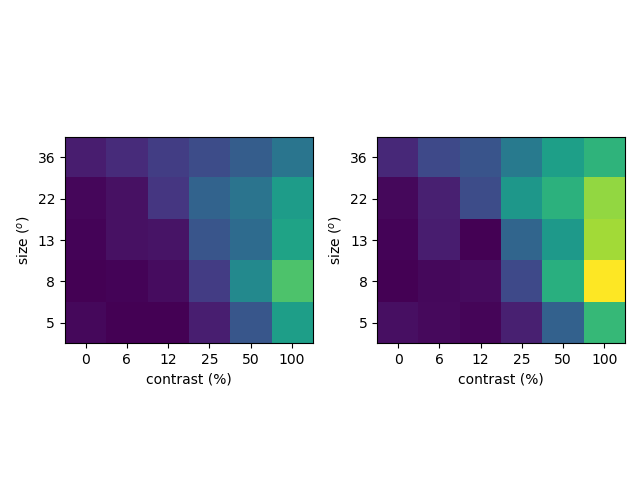

In [330]:
plt.figure()
ic = 0
mx = np.maximum(YY[:,ic].max(),YY_no_sst[:,ic].max())
plt.subplot(1,2,1)
sca.show_size_contrast(YY[:,ic].reshape((nsize,ncontrast)),flipud=True,vmax=mx)
plt.subplot(1,2,2)
sca.show_size_contrast(YY_no_sst[:,ic].reshape((nsize,ncontrast)),flipud=True,vmax=mx)
plt.tight_layout()

<IPython.core.display.Javascript object>


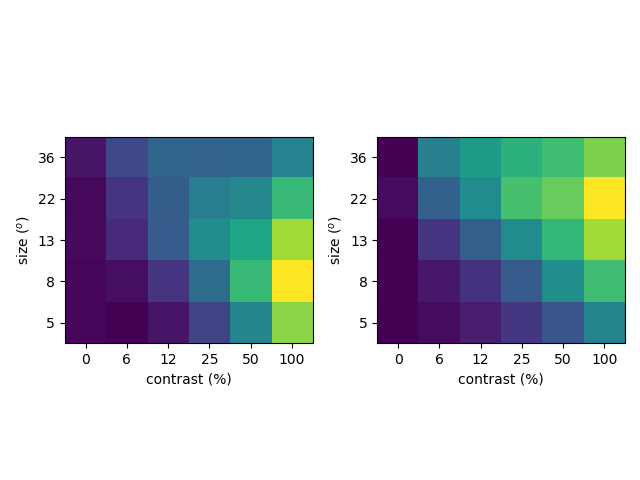

<IPython.core.display.Javascript object>


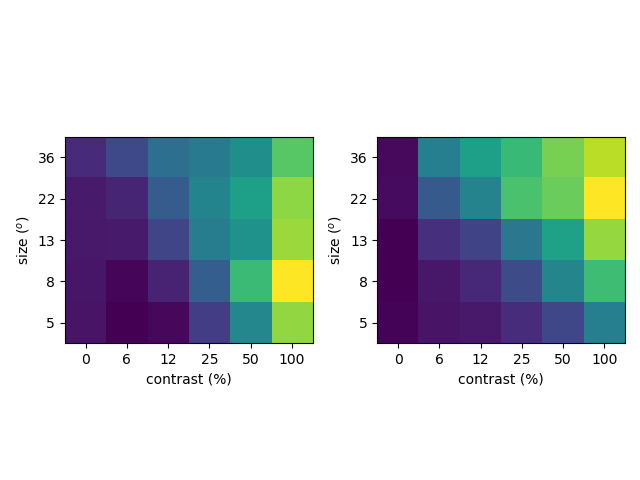

<IPython.core.display.Javascript object>


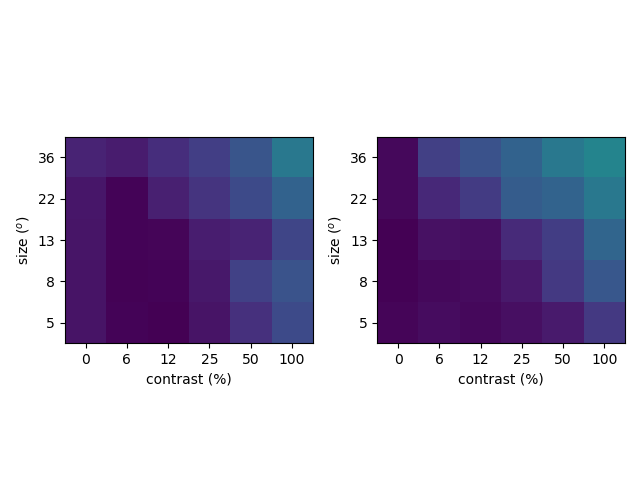

In [296]:
plt.figure()
reload(sca)
plt.subplot(1,2,1)
sca.show_size_contrast(YYhat[:,0].reshape((5,6)),flipud=True)
plt.subplot(1,2,2)
sca.show_size_contrast(YYhat[:,3].reshape((5,6)),flipud=True)
plt.tight_layout()

plt.figure()
reload(sca)
plt.subplot(1,2,1)
sca.show_size_contrast(YY[:,0].reshape((5,6)),flipud=True)
plt.subplot(1,2,2)
sca.show_size_contrast(YY[:,3].reshape((5,6)),flipud=True)
plt.tight_layout()

plt.figure()
reload(sca)
plt.subplot(1,2,1)
sca.show_size_contrast(YY_no_vip[:,0].reshape((5,6)),flipud=True,vmax=YY[:,0].max())
plt.subplot(1,2,2)
sca.show_size_contrast(YY_no_vip[:,3].reshape((5,6)),flipud=True,vmax=YY[:,3].max())
plt.tight_layout()

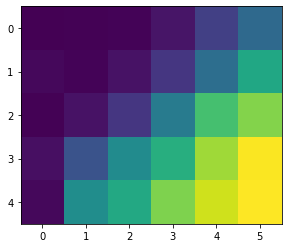

In [382]:
plt.figure()
plt.imshow(XX[:,2].reshape((5,6)))

In [383]:
vip_silencing = np.array((1,1,0,1,1,0))[np.newaxis,:]
Etas = u_fn(XX,YY,Wmx,Wmy,k)
Eta_no_vip = u_fn(XX,vip_silencing*YY,Wmx,Wmy,k) + Eta - Etas
YY_no_vip = compute_f_(Eta_no_vip,Xi,s02)*vip_silencing

In [ ]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','k','Y','momentum','loss']
Wstar_dict = {}
for i,label in enumerate(labels):
    Wstar_dict[label] = Wstar_t[i]

In [ ]:
evaluate_stability(W0my,k0)

In [ ]:
def sorted_r_eigs(w):
    drW,prW = np.linalg.eig(w)
    srtinds = np.argsort(drW)
    return drW[srtinds],prW[:,srtinds]

def gen_Weight(W,K):
    WW0 = np.concatenate((W,W*K[np.newaxis,:]),axis=1)
    WW1 = np.concatenate((W*K[np.newaxis,:],W),axis=1)
    WW = np.concatenate((WW0,WW1),axis=0)
    return WW
    
def evaluate_stability(Wmy,k):
    W = gen_Weight(Wmy,k)
    drW,prW = sorted_r_eigs(W - np.eye(npixels*nQ))
    return np.real(drW[-1])

In [ ]:
t = 999
W0mx,W0my,W0sx,W0sy,s020,k0 = [Wstar_t2[i][t].copy() for i in range(6)]

In [ ]:
nbeta = 51
loss = np.zeros((nbeta,))
stability = np.zeros((nbeta,))
betas = np.linspace(-1,1,nbeta)
vecY = np.random.randn(nQ,nQ)
vecX = np.random.randn(nP,nQ)
for ibeta,beta in enumerate(betas):
    perturbationY = beta*vecY
    perturbationX = beta*vecX
#     perturbationY = beta*np.array(((-1,0,0),(0,0,-1),(0,-1,0))) #beta*np.array(((2,0,0),(0,0,0),(0,0,0))) #perturbationY = beta*np.array(((0,0,0),(0,0,-1),(0,0,0))) # np.array(((0,0,0),(-1,0,0),(0,0,0)))
#     perturbationX = beta*np.array(((-1,0,0),(0,0,0))) #beta*np.array(((-1,0,0),(0,0,0))) #perturbationX = beta*np.array(((0,0,1),(0,0,0)))
#     perturbationSY = 0*beta*np.array(((0,0,0),(0,0,1),(0,0,0)))
    Wmy_beta = perturbationY+W0my.copy()
    Wmx_beta = perturbationX+W0mx.copy()
#     Wsy_beta = perturbationSY+W0sy.copy()
    loss[ibeta] = evaluate_LW(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=Y0.copy(),W0mx=Wmx_beta,W0my=Wmy_beta,W0sx=W0sx.copy(),W0sy=W0sy,s020=s020.copy(),k0=k0.copy(),bounds=bounds,weight=weight)
    stability[ibeta] = evaluate_stability(Wmy_beta,k0)

In [ ]:
plt.figure()
lkat = stability < 0
plt.plot(betas[lkat],loss[lkat])
plt.plot(betas[lkat],stability[lkat])
plt.ylim(-1,0.5)

In [ ]:
(betas[lkat][np.argmin(loss[lkat])],np.min(loss[lkat]))

In [ ]:
beta_star = betas[lkat][np.argmin(loss[lkat])]

In [ ]:
niter = int(1e3)
eta = 0.3
gamma = 0.9
weight = np.array((0,1,0))
beta = 0
perturbationY = beta*beta_star*vecY*1e-2
perturbationX = beta*beta_star*vecX*1e-2
# perturbationY = 0*beta*np.array(((-1,0,0),(0,0,-1),(0,-1,0))) #beta*np.array(((2,0,0),(0,0,0),(0,0,0))) #perturbationY = beta*np.array(((0,0,0),(0,0,-1),(0,0,0))) # np.array(((0,0,0),(-1,0,0),(0,0,0)))
# perturbationX = 0*beta*np.array(((-1,0,0),(0,0,0))) #beta*np.array(((-1,0,0),(0,0,0))) #perturbationX = beta*np.array(((0,0,1),(0,0,0)))
# # perturbationSY = beta*np.array(((0,0,0),(0,0,1),(0,0,0)))
# thisY0 = np.ones_like(Y0)
Y0 = [np.concatenate([x.mean(0)[:,np.newaxis] for x in Yhat[ialign]],axis=1) for ialign in range(npixels)]
Wstar_t2 = fit_W_momentum(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=Y0.copy(),W0mx=perturbationX+W0mx.copy(),W0my=perturbationY+W0my.copy(),W0sx=W0sx.copy(),W0sy=W0sy.copy(),s020=s020.copy(),k0=k0.copy(),bounds=bounds,niter=niter,weight=weight,eta=eta,gamma=gamma,barrier_wt=100e-4)#,eta_decay=eta_decay)

In [ ]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','k','Y','momentum','loss']
Wstar_dict2 = {}
for i,label in enumerate(labels):
    Wstar_dict2[label] = Wstar_t2[i]
# np.save('weights_190912.npy',Wstar_dict2)

In [ ]:
np.linalg.eig(Wstar_dict2['Wmy'][400]-np.eye(nQ))

In [ ]:
titles = ['PC','SST','VIP']
t = 500
plt.figure(figsize=(6,2))
lbl = 'Wmx'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L4 PC->','spont']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])

plt.figure(figsize=(9,2))
lbl = 'Wmy'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L2/3 PC->','SST->','VIP->']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])
    
plt.figure(figsize=(6,2))
lbl = 'Wsx'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L4 PC->','spont']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])

plt.figure(figsize=(9,2))
lbl = 'Wsy'
data = Wstar_dict2[lbl][t]
x = np.arange(data.shape[0])
xlbl = ['L2/3 PC->','SST->','VIP->']
for icelltype in range(3):
    plt.subplot(1,3,icelltype+1)
    plt.bar(x,data[:,icelltype])
    plt.xticks(x,xlbl)
    plt.ylim(data.min()-0.2,data.max()+0.2)
    plt.title(titles[icelltype])


In [ ]:
#Wstar_dict = np.load('w_over_time_miller_troyer_data_loss.npy',allow_pickle=True)[()]

In [ ]:
Wstar_t_init = [ww[-1].copy() for ww in Wstar_t2]
W0mx,W0my,W0sx,W0sy,s020 = [Wstar_t_init[i].copy() for i in range(5)]
Y0 = Wstar_t_init[-3].copy()

In [ ]:
niter = int(1e4)
eta = 1
gamma = 0.9
eta_decay = 1e-3
weight = np.array((1,1,1))
thisY0 = np.ones_like(Y0)
Wstar_t_novar = fit_W_momentum(X.copy(),Yhat.copy(),pop_rate_fn=f_miller_troyer,neuron_rate_fn=evaluate_f_mt,Y0=thisY0,W0mx=W0mx.copy(),W0my=W0my.copy(),W0sx=W0sx.copy(),W0sy=W0sy.copy(),s020=s020.copy(),bounds=bounds,niter=niter,weight=weight,eta=eta,gamma=gamma)#,eta_decay=eta_decay)

In [ ]:
# niter = int(1e3)
plt.figure()
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(Wstar_t2[i].reshape((niter+1,-1)))
plt.figure()
plt.plot(Wstar_t2[4].reshape((niter+1,-1)))

In [ ]:
# labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum','loss']
# Wstar_dict = {}
# for i,label in enumerate(labels):
#     Wstar_dict[label] = Wstar_t[i]
# np.save('w_over_time_miller_troyer_data_loss.npy',Wstar_dict,allow_pickle=True)

In [ ]:
# labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum','loss']
#Wstar_dict = {}
#for i,label in enumerate(labels):
#    Wstar_dict[label] = Wstar_t[i]


In [ ]:
def plot_tuning_and_loss(this_Wstar):
    plt.figure()
    plt.plot((this_Wstar[-3]/this_Wstar[-3].sum(1)[:,np.newaxis]).reshape((niter+1,-1)))
    plt.figure()
    plt.plot(this_Wstar[-1].reshape((niter+1,-1)))

In [ ]:
#niter = 300
plot_tuning_and_loss([x[:niter+1] for x in Wstar_t2])

In [ ]:
def scatter_results_spatial(this_Wstar,t=-1):
    plt.figure(figsize=(9,6))
    celltype = ['PC','SST','VIP']
    ialign = 0
    for ialign in range(2):
        for i in range(3):
            plt.subplot(2,3,3*ialign+i+1)
            plt.title(celltype[i])
            xx = Yhat[ialign][i].mean(0)/Yhat[ialign][i].mean(0).sum()
            yy = this_Wstar[-3][t,:,3*ialign+i]/this_Wstar[-3][t,:,3*ialign+i].sum()
            sca.scatter_size_contrast(xx,yy)
            plt.plot((0,xx.max()),(0,xx.max()),c='k')
            plt.xlabel('measured')
            plt.ylabel('modeled')
            plt.tight_layout()

In [ ]:
t = 500
scatter_results_spatial(Wstar_t2,t=t) #int(5e3))
# plt.savefig('figures/pc_sst_vip_measured_modeled_miller_troyer.pdf')

In [ ]:
def gaussian_fn(mu,sigma):
    return lambda x: 1/np.sqrt(2*np.pi)/np.abs(sigma)*np.exp(-0.5*(x-mu)/sigma**2)
xs = np.linspace(0,1,100)
ipt = 0
# plt.figure()
# for icelltype in range(2):
#     plt.plot(xs,gaussian_fn(um_fn(X[ipt],Y[ipt])[icelltype],us_fn(X[ipt],Y[ipt])[icelltype])(xs))

In [224]:
iiter = -1
Wmx,Wmy,Wsx,Wsy = [Wstar_t[i][iiter] for i in range(4)]

def fXY(x,y):
    return f_miller_troyer(x @ Wmx + y @ Wmy, x @ Wsx + y @ Wsy)

def u_fn_fn(Wx,Wy):
    return lambda x,y: x @ Wx + y @ Wy

def um_fn(x,y):
    return u_fn_fn(Wmy,Wmx)(x,y)

def us_fn(x,y):
    return u_fn_fn(Wsy,Wsx)(x,y)

# Ysolns = compute_Y_nonlinear_t_evolution(X,Wmx,Wmy,Wsx,Wsy,f_miller_troyer,Y0=Wstar_t[-2][iiter+1].copy())

NameError: name 'Wstar_t' is not defined

In [327]:
Xlbl = [['L4','spont'],['PC','SST','VIP']]
Ylbl = ['PC','SST','VIP']

In [283]:
for i in range(2):
    values0 = np.round(Wstar_t_novar[i][-1],decimals=2)
    values1 = np.round(Wstar_t_novar[i+2][-1],decimals=2)
    to_print = np.zeros_like(values0,dtype='<U32')
    if np.mod(i,2)==0:
        for i in range(to_print.shape[0]):
            for j in range(to_print.shape[1]):
                to_print[i,j] = Xlbl[0][i] + ' -> ' + Xlbl[1][j] + ': ' + str(values0[i,j]) + ' +/- ' + str(values1[i,j])
    else: 
        for i in range(to_print.shape[0]):
            for j in range(to_print.shape[1]):
                to_print[i,j] = Ylbl[i] + ' -> ' + Ylbl[j] + ': ' + str(values0[i,j]) + ' +/- ' + str(values1[i,j])
    print(to_print)
    print('\n')
# for i in range(4,5):
#     values = np.round(Wstar_t[i][-1],decimals=2)
#     print(values)

NameError: name 'Wstar_t_novar' is not defined

<IPython.core.display.Javascript object>


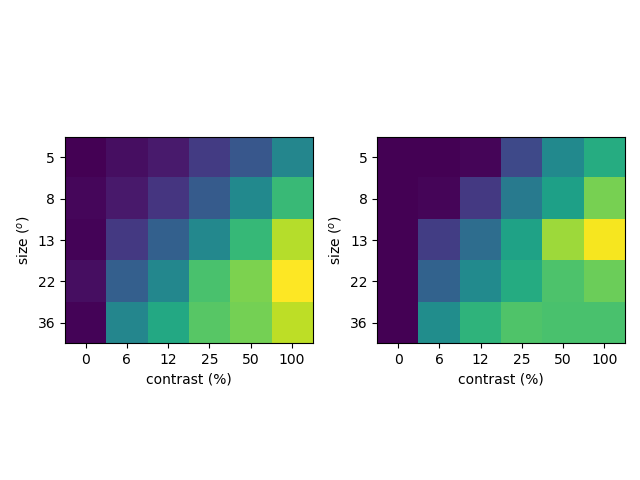

<IPython.core.display.Javascript object>


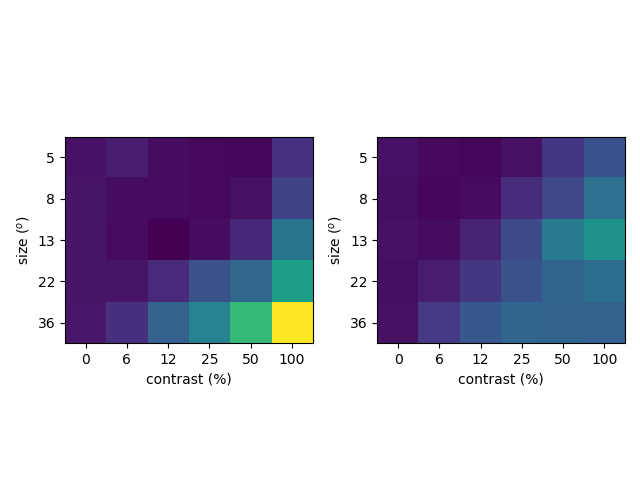

<IPython.core.display.Javascript object>


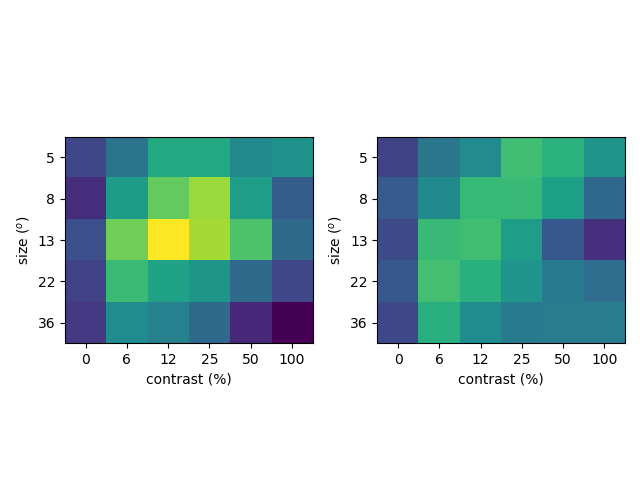

In [541]:
#lbl = ['pc','sst','vip']
#for icelltype in range(3):
#    this_Wstar = Wstar_t_novar
#    t = -1
#    display_model_fit(Yhat[icelltype].mean(0)/Yhat[icelltype].mean(0).sum(),this_Wstar[-3][t,:,icelltype]/this_Wstar[-3][t,:,icelltype].sum())
#    plt.savefig('figures/' + lbl[icelltype] + '_measured_modeled.pdf')

In [585]:
labels = ['Wmx','Wmy','Wsx','Wsy','s02','Y','momentum','loss']
Wstar_dict = {}
for i,label in enumerate(labels):
    Wstar_dict[label] = Wstar_t[i]

In [586]:
np.save('w_over_time_miller_troyer_data_loss_momentum.npy',Wstar_dict,allow_pickle=True)

In [270]:
def scatter_results(this_Wstar,t=-1):
    plt.figure(figsize=(9,3))
    celltype = ['PC','SST','VIP']
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.title(celltype[i])
        xx = Yhat[i].mean(0)/Yhat[i].mean(0).sum()
        yy = this_Wstar[-3][t,:,i]/this_Wstar[-3][t,:,i].sum()
        sca.scatter_size_contrast(xx,yy)
        plt.plot((0,xx.max()),(0,xx.max()),c='k')
        plt.xlabel('measured')
        plt.ylabel('modeled')
        plt.tight_layout()

In [1]:
icelltype = 3
u,s,v = np.linalg.svd(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])])
# plt.figure()
# plt.imshow(Rs[1][])

NameError: name 'np' is not defined

<IPython.core.display.Javascript object>


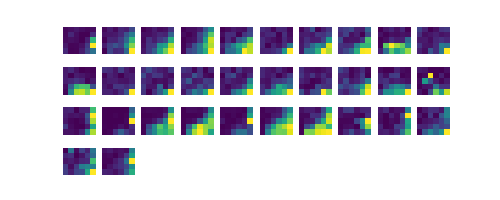

In [500]:
ut.imshow_in_rows(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])][np.where(np.logical_and(u[:,0]<np.percentile(u[:,0],52.5),u[:,0]>np.percentile(u[:,0],47.5)))].reshape((-1,5,6)))

<IPython.core.display.Javascript object>


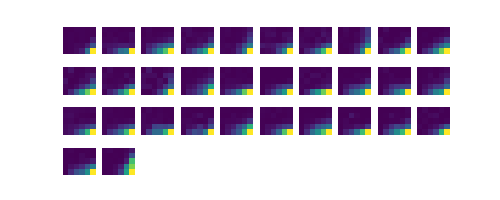

In [501]:
ut.imshow_in_rows(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])][np.where(u[:,0]<np.percentile(u[:,0],5))].reshape((-1,5,6)))

<IPython.core.display.Javascript object>


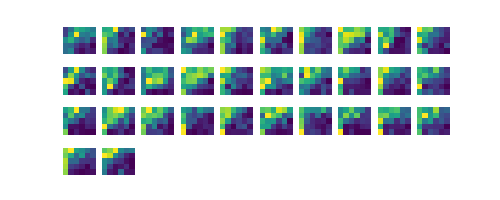

In [502]:
ut.imshow_in_rows(Rs[icelltype][~np.isnan(Rs[icelltype][:,0])][np.where(u[:,0]>np.percentile(u[:,0],95))].reshape((-1,5,6)))

<IPython.core.display.Javascript object>


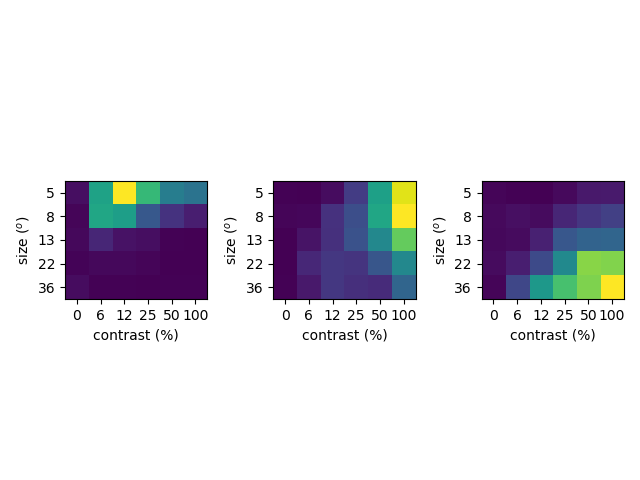

In [508]:
# ut.imshow_in_rows(Rs[1][~np.isnan(Rs[1][:,0])][np.where(u[:,0]>np.percentile(u[:,0],95))].reshape((-1,5,6)))
lower = np.where(u[:,0]<np.percentile(u[:,0],5))[0][28]
middle = np.where(np.logical_and(u[:,0]<np.percentile(u[:,0],52.5),u[:,0]>np.percentile(u[:,0],47.5)))[0][19]
upper = np.where(u[:,0]>np.percentile(u[:,0],95))[0][90]
plt.figure()
for i,thisone in enumerate([upper,middle,lower]):
    plt.subplot(1,3,i+1)
    sca.show_size_contrast(Rs[1][~np.isnan(Rs[1][:,0])][thisone].reshape((5,6)))
plt.tight_layout()
plt.savefig('figures/l23_pc_variability.pdf')

<IPython.core.display.Javascript object>


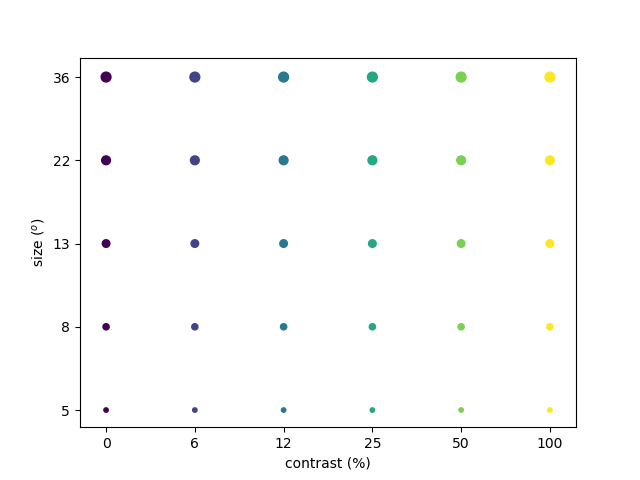

In [519]:
plt.figure()
xx,yy = np.meshgrid(np.arange(6),np.arange(5))
xx = xx.flatten()
yy = yy.flatten()
sca.scatter_size_contrast(xx,yy)
plt.xticks(np.arange(6),(0,6,12,25,50,100))
plt.xlabel('contrast (%)')
plt.yticks(np.arange(5),(5,8,13,22,36))
plt.ylabel('size ($^o$)')
plt.savefig('figures/measured_modeled_legend.pdf')
# plt.axis('off')

In [278]:
#niter = int(1e3)
#Ws = [Wstar_t[i][-1].copy() + 1e-2*np.random.randn(*Wstar_t[i][-1].shape) for i in range(4)]
#Wstar_t2 = fit_W_linearized_pointwise(X.copy(),Yhat.copy(),f_miller_troyer,Y0=Yhat.copy(),W0mx=Ws[0],W0my=Ws[1],W0sx=Ws[2],W0sy=Ws[3],bounds=bounds,niter=niter,weight=np.array((1,10,1)))
#scatter_results(Wstar_t2)

In [308]:
def pca_denoise(arr,Npc):
    u,s,v = np.linalg.svd(arr)
    return u[:,:Npc] @ np.diag(s[:Npc]) @ v[:Npc,:]

In [309]:
Rpc2 = pca_denoise(Rpc[~np.isnan(Rpc.sum(1))],10)

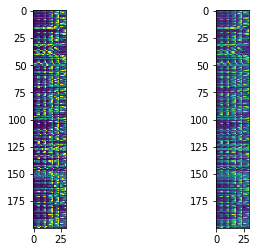

In [312]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Rpc[:200])
plt.subplot(1,2,2)
plt.imshow(Rpc2[:200])